# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План проекта:**
- Провести предобработку данных (привести названия столбцов к нижнему регистру,выявить и обработать пропуски данных(при их обнаружении), при необходимости изменить типы данных, найти и обработать дубликаты (при их обнаружении)).
- Провести исследовательский анализ данных:
  - сколько игр выпускалось в разные годы,
  - как менялись продажи по платформам, 
  - какие платформы лидируют по продажам, растут или падают,
  - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, 
  - посмотреть на общее распределение игр по жанрам.
- Составить портрет пользователя каждого региона.
- Проверить гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

Загрузим данные и выведем первые 5 строк датафрейма

In [2]:
data = pd.read_csv('C:/Users/belya_6mcgih7/Downloads/game.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датафрейм содержит информацию о названиях компьютерных игр, платформах и жанрах, годе релиза, продажах в Северной Америке, Европе, Японии и других регионах, оценки пользователей и критиков, а также рейтинг по системе ESRB. 
Можно заметить пропуски в данных, названия колонок необходимо привести к нижнему регистру, изменить типы данных в столбцах.

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [3]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Выведем информацию о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# введем переменную с начальным количеством строк датафрейма для дальнейшего использования
shape_start = data.shape[0]
shape_start

16715

Для дальнейшей работы необходимо заменить тип данных в столбце user_score с object на float64 (числовой).

In [6]:
data['user_score'] = pd.to_numeric(data['user_score'],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Тип данных в столбце year_of_release заменим на int после обработки пропусков.

### Найдем и обработаем пропуски данных и дубликаты

#### Дубликаты

In [7]:
data.duplicated().sum()

0

Явные дубликаты в датафрейме отсутствуют.

In [8]:
# Найдем неявные дубликаты
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
# Удалим найденные дубликаты
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')


In [10]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Обработаем пропуски

In [11]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Пропуски присутствуют в столбцах name, genre, year_of_release, critic_score, user_score и rating.

Посмотрим на их количество в процентах.

In [12]:
data.isna().mean()

name               0.000060
platform           0.000000
year_of_release    0.016095
genre              0.000060
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513193
user_score         0.545922
rating             0.404775
dtype: float64

Пропуски в столбцах critic_score,user_score составляют больше 50%, rating 40%.

Количество пропусков в столбцах name и genre минимально (0,01%) , удалим строки, содержащие эти пропуски. На дальнейшем анализе это существенно не отразится. 

In [13]:
data = data.dropna(subset=['name','genre'])


Обработаем пропуски в столбце с годом релиза и рейтингом ESRB . В нашем датафрейме есть данные по году релиза и рейтинг от организации ESRB для некоторых компьютерных игр. Заменим пропуски на известные значения.

In [14]:
#Создадим словарь с известными годами релиза.
year_of_release_dict = data.dropna(subset=['year_of_release']).set_index('name')['year_of_release'].to_dict()


In [15]:
#Заменим пропуски на известные значения.
data['year_of_release'] = data.apply(
    lambda row: year_of_release_dict.get(row['name'], row['year_of_release']) if pd.isna(row['year_of_release']) else row['year_of_release'],
    axis=1
)


In [16]:
# Создадим словарь с известным рейтингом для игр
rating_dict = data.dropna(subset=['rating']).set_index('name')['rating'].to_dict()

In [17]:
#Заменим пропуски на известные значения.
data['rating'] = data.apply(
    lambda row: rating_dict.get(row['name'], row['rating']) if pd.isna(row['rating']) else row['rating'],
    axis=1
)


Пропуски в столбцах critic_score, user_score составляют значительную часть датафрейма (40-55%), их удаление приведет к потере данных и неадекватному анализу. Заменим значения 'tbd' на 'nan', а затем пропуски в столбце 'user_score' и critic_score на заглушки.     

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].replace('tbd', np.nan)
data['critic_score'] = data['critic_score'].fillna(-1)


In [19]:
data.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6327
dtype: int64

Количество пропусков в столбце rating удалось немного уменьшить.Пропуски в столбцах name, genre и user_score отсутствуют, количество пропусков в столбце year_of_release удалось уменьшить примерно в два раза. Удалим оставшиеся строки с пропусками в столбце year_of_release.

In [20]:
data = data.dropna(subset=['year_of_release'])
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.000000
user_score         0.000000
rating             0.378003
dtype: float64

Пропуски в столбцах name, genre, year_of_release, critic_score, user_score удалены. Количество пропусков в столбце rating удалось уменьшить на 3%. Оставшиеся пропуски заменим на 'unknown'.

In [21]:
data['rating'] = data['rating'].fillna('unknown')

In [22]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

***Все пропуски удалены***

Заменим тип данных в столбце year_of_release на int.

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16566 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16566 non-null  object 
 1   platform         16566 non-null  object 
 2   year_of_release  16566 non-null  int32  
 3   genre            16566 non-null  object 
 4   na_sales         16566 non-null  float64
 5   eu_sales         16566 non-null  float64
 6   jp_sales         16566 non-null  float64
 7   other_sales      16566 non-null  float64
 8   critic_score     16566 non-null  float64
 9   user_score       16566 non-null  float64
 10  rating           16566 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [25]:
data.shape[0]/shape_start

0.9910858510320072

Количество оставшихся после предобработки данных - 99%. Можем продолжать анализ.

**Возможные причины появления пропусков в базе данных:**
1. **Технические ошибки** 
 - ошибки при вводе данных в систему или технические сбои могут привести к потере или неправильному сохранению данных,
 - ошибки при загрузке и выгрузке данных;
 - ошибки при обработке данных или переносе информации из одной системы в другую, что может привести к потере или искажению данных;
2. **Человеческий фактор**
 - ошибка при вводе данных вручную,
 - неправильное форматирование данных;
3. **Отсутствие данных**
 - некорректное (неполное) заполнение данных, 
 - желание скрыть определенную информацию (или ввести в заблуждение).

Аббревиатура "tbd" в столбце с оценкой пользователей обычно означает "To Be Determined" (что переводится как "будет определено"). Это указывает на то, что оценка ещё не установлена или будет добавлена позже. 

Это может означать, что оценка ещё не предоставлена (например, если продукт или услуга новые, пользователи ещё не успели оставить свои оценки)или оценка находится в процессе обновления (возможно, данные о текущих оценках собираются или анализируются и будут опубликованы в ближайшее время).

Медианное значение является устойчивым к выбросам и хорошо подходит для данных с числовыми значениями, такими как рейтинги, поэтому при обработке пропусков замена значения "tbd" на медианное будет предпочтительнее. 

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [26]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


В процессе предобработки данных:
- названия колонок приведены к нижнему регистру,
- заменен тип данных в столбцах 'year_of_release'( на int), 'user_score' (с object на float64),
- найдены и обработаны неявные дубликаты в столбце 'name', в остальных столбцах явные и неявные дубликаты остутствуют,
- для дальнейшей работы в датафрейм добавлен столбец 'total_sales' с суммарными продажами во всех регионах. 

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

In [27]:
grouped_data = data.groupby('year_of_release')['name'].count().reset_index()
grouped_data

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [28]:
grouped_data['name'].describe()

count      37.000000
mean      447.729730
std       455.886721
min         9.000000
25%        36.000000
50%       339.000000
75%       765.000000
max      1440.000000
Name: name, dtype: float64

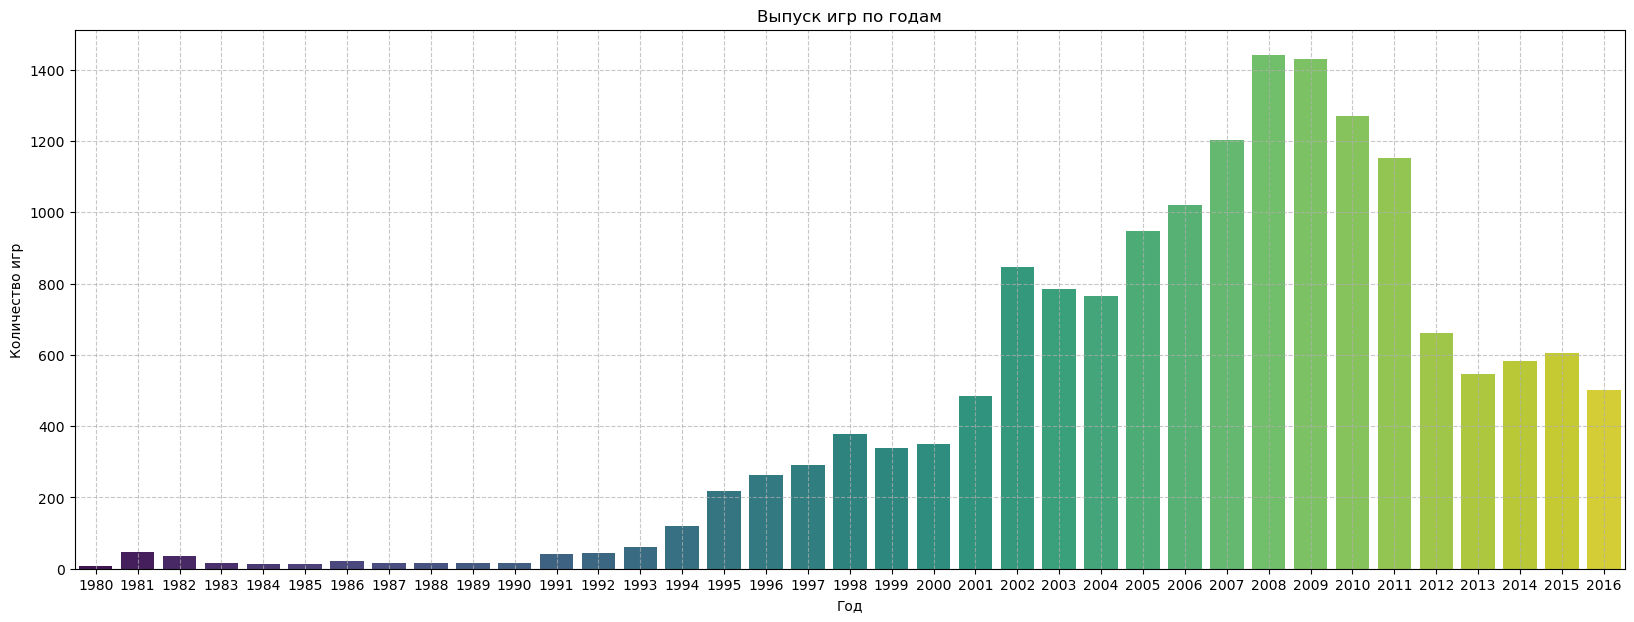

In [29]:
plt.figure(figsize=(20, 7))
sns.barplot(x='year_of_release', y='name', data=grouped_data, palette='viridis')

plt.title('Выпуск игр по годам')
plt.xlabel("Год")
plt.ylabel("Количество игр")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

До 1995 года ежегодно выпускалось менее 200 игр. Данные за этот период не будут играть существенную роль для прогноза на 2017 год. Пиковыми были 2006-2011 годы, когда выпускалось более 1000 игр в год (максимум отмечается в 2008-2009 гг), затем отмечается спад. В 2012-2016 гг выпускалось около 600 игр ежегодно.

In [30]:
data = data[data['year_of_release'] >= 1995]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [31]:
data.shape[0]/shape_start

0.962010170505534

Оставшееся количество данных после удаления 96,2%. Можем продолжать анализ.

### Оценим доходность разных платформ

In [32]:
data_platforms = data.groupby('platform')['total_sales'].sum().reset_index()
data_platforms = data_platforms.sort_values(by='total_sales')
data_platforms
    
    

,platform,total_sales
11,PCFX,0.03
1,3DO,0.08
20,TG16,0.16
9,NG,0.43
21,WS,1.42
0,2600,2.53
3,DC,15.95
18,SAT,29.94
19,SNES,49.59
17,PSV,53.81


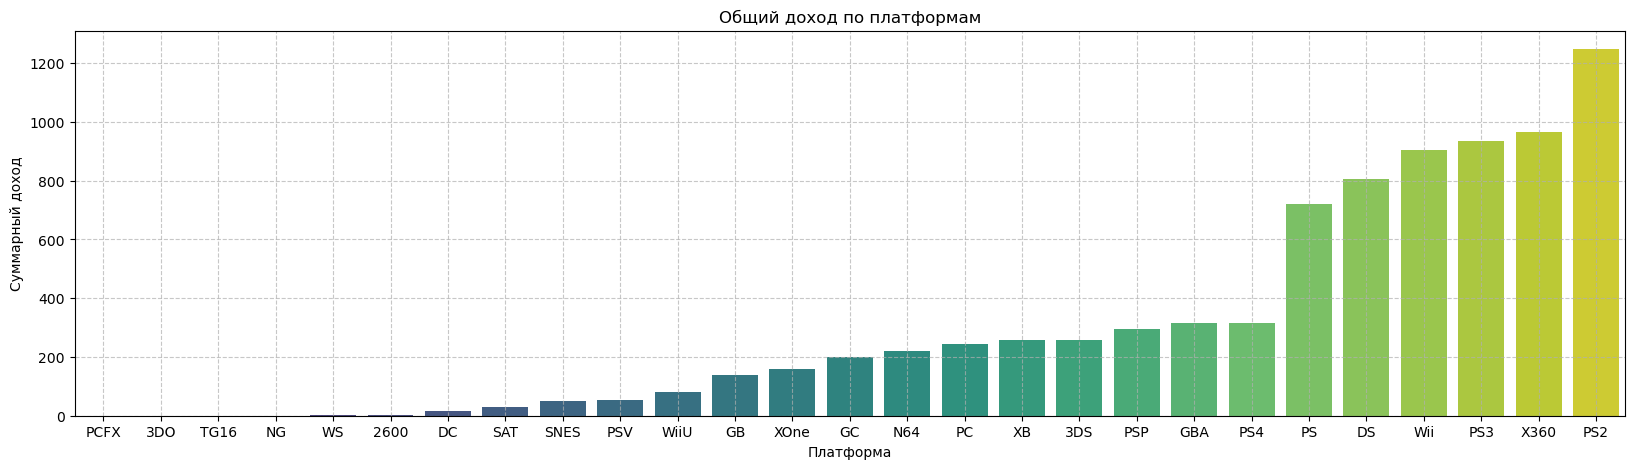

In [33]:
plt.figure(figsize=(20, 5))
sns.barplot(x='platform', y='total_sales', data=data_platforms, palette='viridis')

plt.title('Общий доход по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди всех платформ можно выделить 6 с максимальными суммарными продажами (более 700 млн проданных копий): PS2, X360, PS3 (максимальные продажи), Wii, DS, PS.

### Оценим продажи самых покупаемых платформ по годам

#### Платформа DS

In [34]:
 data_ds = data[data['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum().reset_index()
 data_ds   

,year_of_release,total_sales
0,2004,17.27
1,2005,130.14
2,2006,119.81
3,2007,147.23
4,2008,145.36
5,2009,119.56
6,2010,85.35
7,2011,26.33
8,2012,11.67
9,2013,1.54


In [35]:
data_ds['total_sales'].describe()

count     10.000000
mean      80.426000
std       59.742914
min        1.540000
25%       19.535000
50%      102.455000
75%      127.557500
max      147.230000
Name: total_sales, dtype: float64

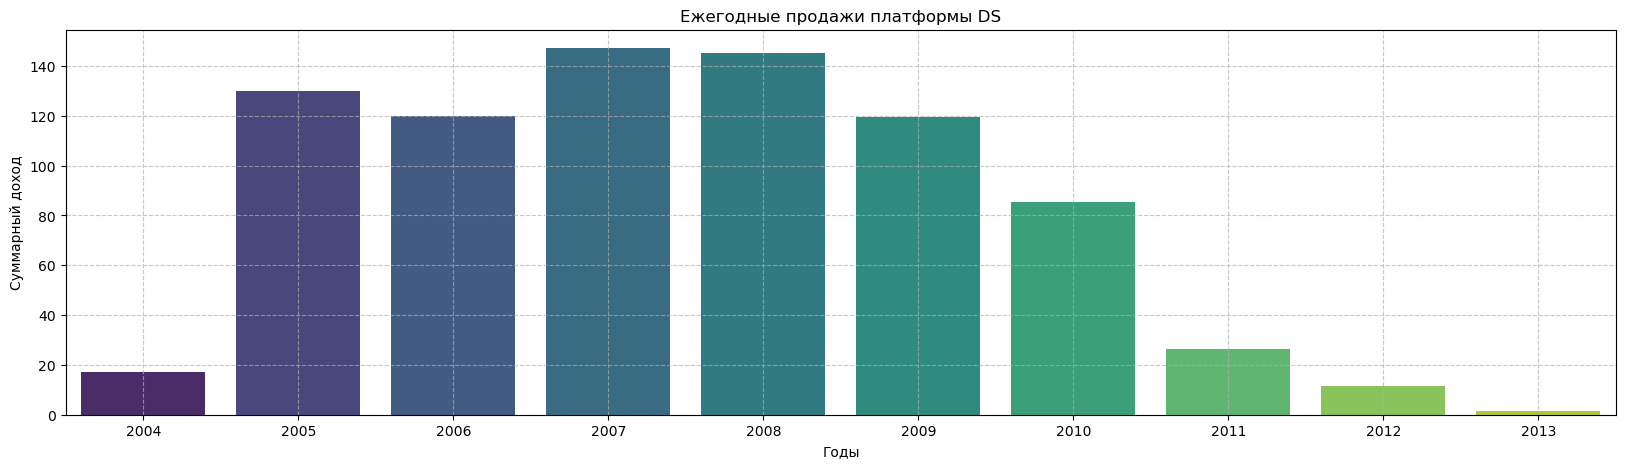

In [36]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data_ds, palette='viridis')

plt.title('Ежегодные продажи платформы DS')
plt.xlabel('Годы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Через год после возникновения платформы продажи резко возросли. Максимальные продажи отмечались в 2007-2008 гг., затем начался спад. Платформа существовала 10 лет. 

#### Платформа PS

In [37]:
data_ps = data[data['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum().reset_index()
data_ps

,year_of_release,total_sales
0,1995,35.96
1,1996,94.70
2,1997,136.17
3,1998,169.49
4,1999,144.53
5,2000,96.37
6,2001,35.59
7,2002,6.67
8,2003,2.07


In [38]:
data_ps['total_sales'].describe()

count      9.000000
mean      80.172222
std       62.423547
min        2.070000
25%       35.590000
50%       94.700000
75%      136.170000
max      169.490000
Name: total_sales, dtype: float64

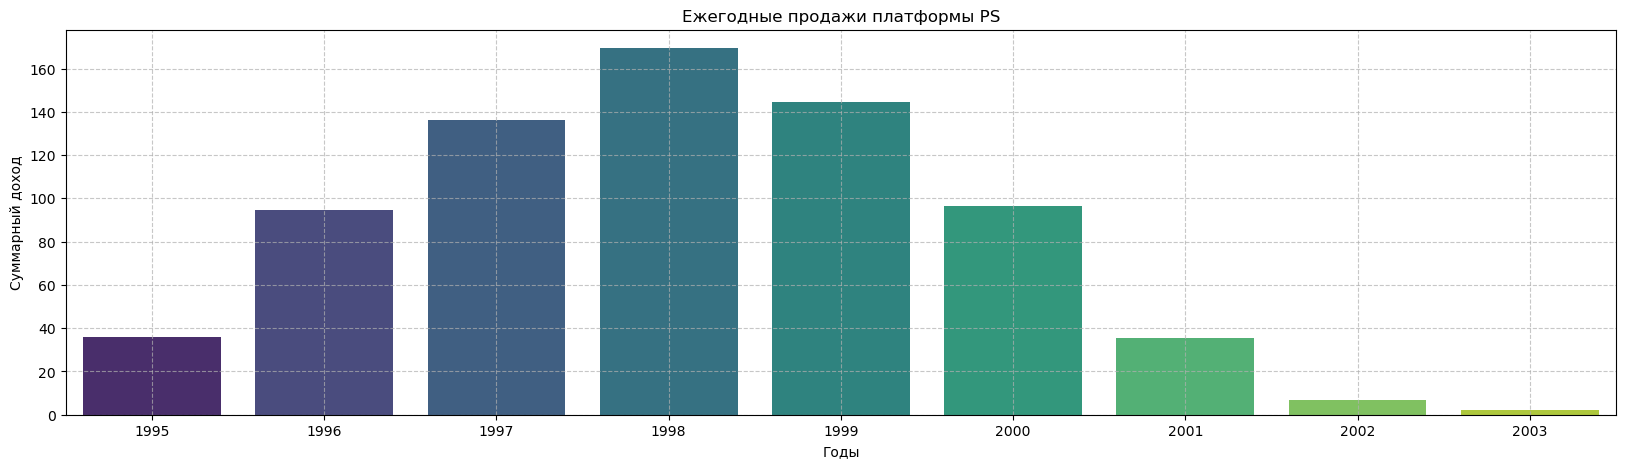

In [39]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data_ps, palette='viridis')

plt.title('Ежегодные продажи платформы PS')
plt.xlabel('Годы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

После возникновения платформы в 1995 году начался постепенный рост продаж, пиковым был 1998 год, затем начался спад. Платформа существовала 9 лет.

#### Платформа PS2

In [40]:
data_ps2 = data[data['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum().reset_index()
data_ps2

,year_of_release,total_sales
0,1997,0.95
1,2000,39.17
2,2001,166.43
3,2002,208.36
4,2003,193.05
5,2004,211.81
6,2005,160.91
7,2006,103.99
8,2007,76.10
9,2008,53.90


In [41]:
data_ps2['total_sales'].describe()

count     13.000000
mean      95.935385
std       82.292350
min        0.450000
25%       26.400000
50%       76.100000
75%      166.430000
max      211.810000
Name: total_sales, dtype: float64

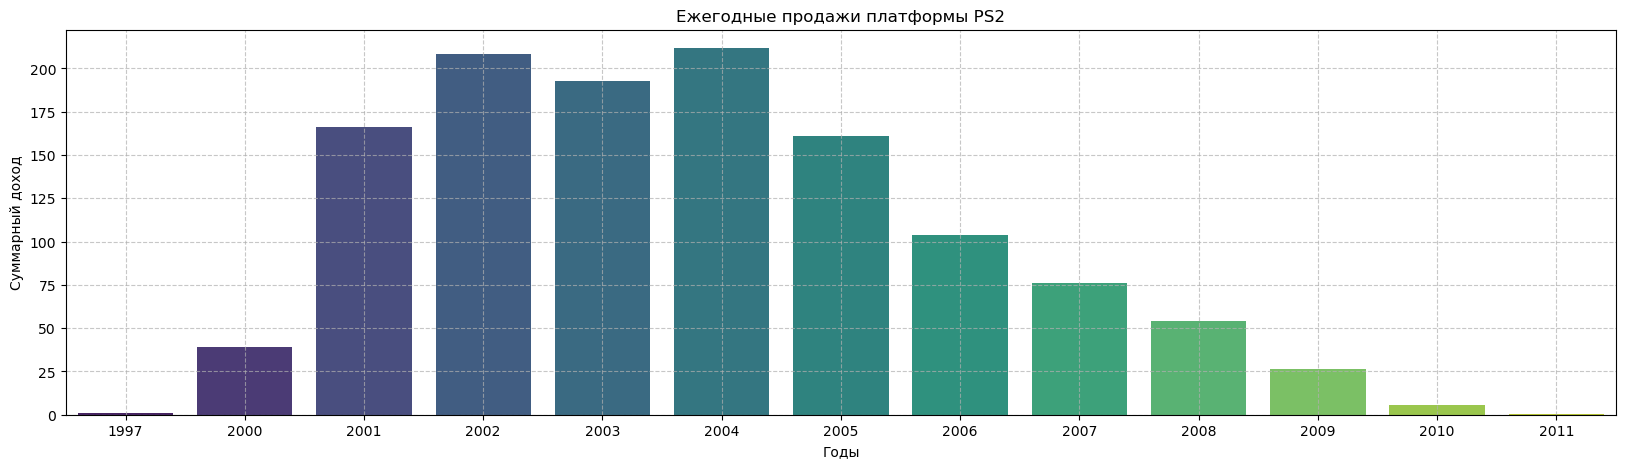

In [42]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data_ps2, palette='viridis')

plt.title('Ежегодные продажи платформы PS2')
plt.xlabel('Годы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Рост продаж начался только через 4 года после возникновения платформы. Максимальные продажи отмечались в 2002-2004 гг, затем отмечается постепенный спад. Существовала платформа 15 лет (из которых первые 3 и последний были практически без продаж).

#### Платформа PS3

In [43]:
data_ps3 = data[data['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum().reset_index()
data_ps3

,year_of_release,total_sales
0,2005,0.19
1,2006,21.44
2,2007,73.19
3,2008,118.79
4,2009,130.93
5,2010,142.96
6,2011,157.98
7,2012,108.27
8,2013,113.25
9,2014,47.76


In [44]:
data_ps3['total_sales'].describe()

count     12.000000
mean      77.931667
std       57.769264
min        0.190000
25%       20.285000
50%       90.730000
75%      121.825000
max      157.980000
Name: total_sales, dtype: float64

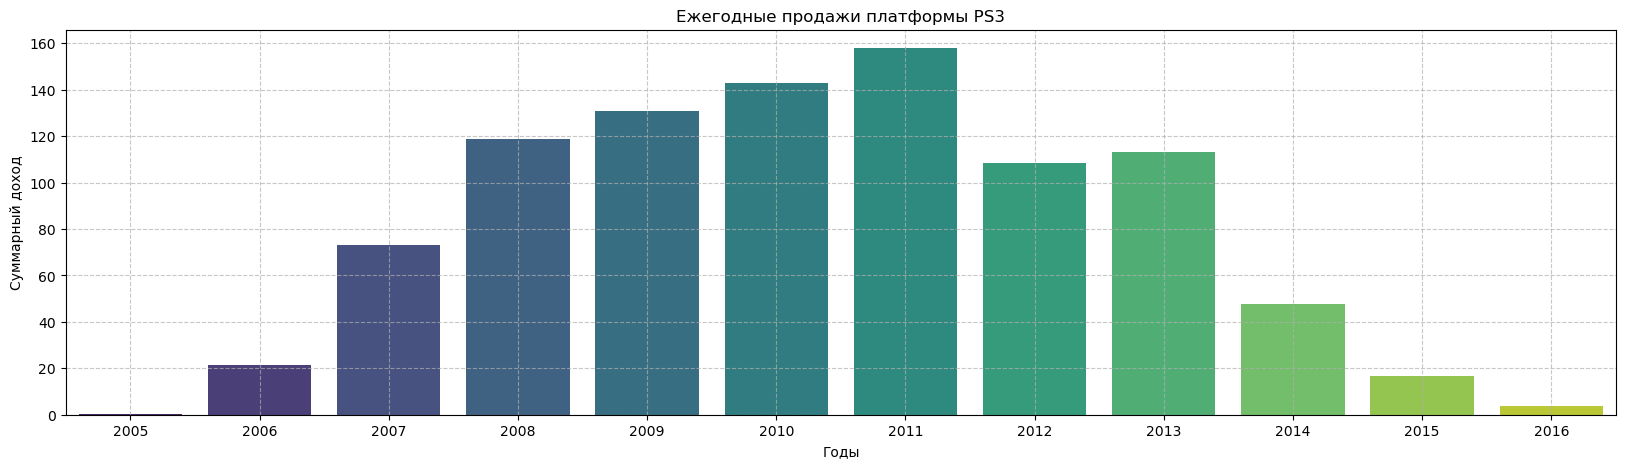

In [45]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data_ps3, palette='viridis')

plt.title('Ежегодные продажи платформы PS3')
plt.xlabel('Годы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Со второго года после возникновения платформы начался рост продаж, пиковым стал 2011 год, затем продажи снизились,и после 2016 г платформа перестала существовать (срок - 12 лет)

#### Платформа Wii

In [46]:
data_wii = data[data['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum().reset_index()
data_wii

,year_of_release,total_sales
0,2006,140.19
1,2007,153.41
2,2008,177.68
3,2009,206.97
4,2010,128.67
5,2011,59.79
6,2012,22.94
7,2013,8.59
8,2014,3.75
9,2015,1.14


In [47]:
data_wii['total_sales'].describe()

count     11.000000
mean      82.119091
std       80.101105
min        0.180000
25%        6.170000
50%       59.790000
75%      146.800000
max      206.970000
Name: total_sales, dtype: float64

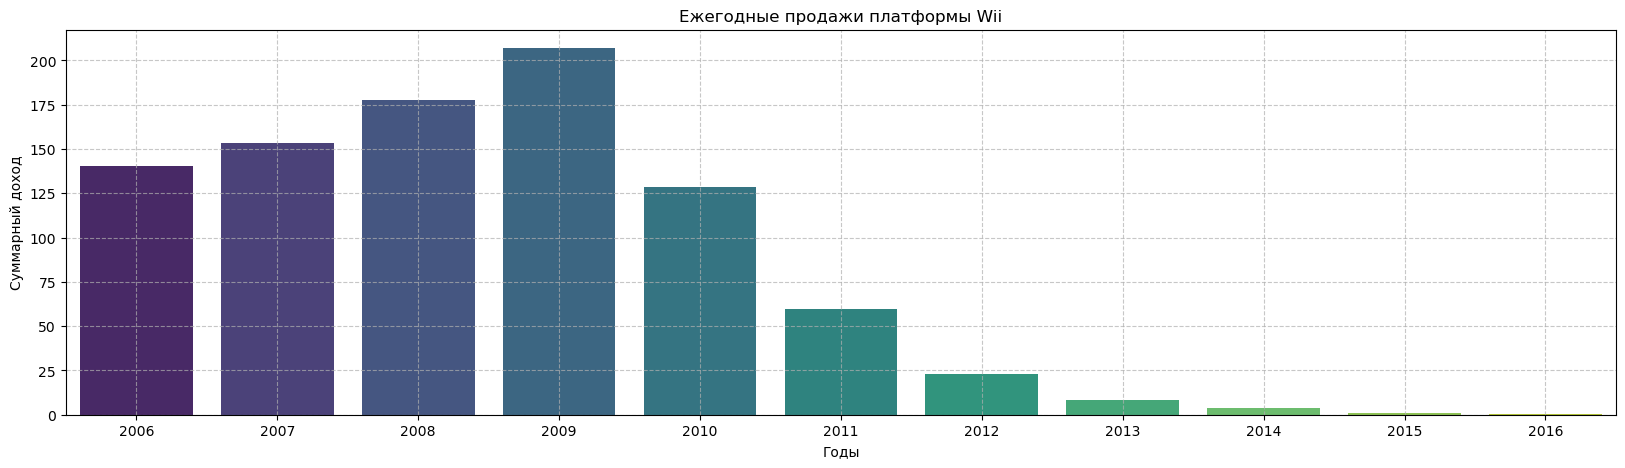

In [48]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data_wii, palette='viridis')

plt.title('Ежегодные продажи платформы Wii')
plt.xlabel('Годы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Платформа существовала 11 лет. Максимальные продажи отмечались в первые годы после ее возникновения, пик пришелся на 2009 год, затем отмечается спад.Значение стандартного отклонения достаточно высокое, как и разница между медианой и средней, что говорит о нестабильности продаж.

#### Платформа X360

In [49]:
data_x360 = data[data['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum().reset_index()
data_x360

,year_of_release,total_sales
0,2005,9.22
1,2006,51.79
2,2007,95.41
3,2008,136.07
4,2009,120.82
5,2010,170.55
6,2011,145.23
7,2012,100.72
8,2013,88.58
9,2014,34.74


In [50]:
data_x360['total_sales'].describe()

count     12.000000
mean      80.550833
std       57.716995
min        1.520000
25%       29.045000
50%       91.995000
75%      124.632500
max      170.550000
Name: total_sales, dtype: float64

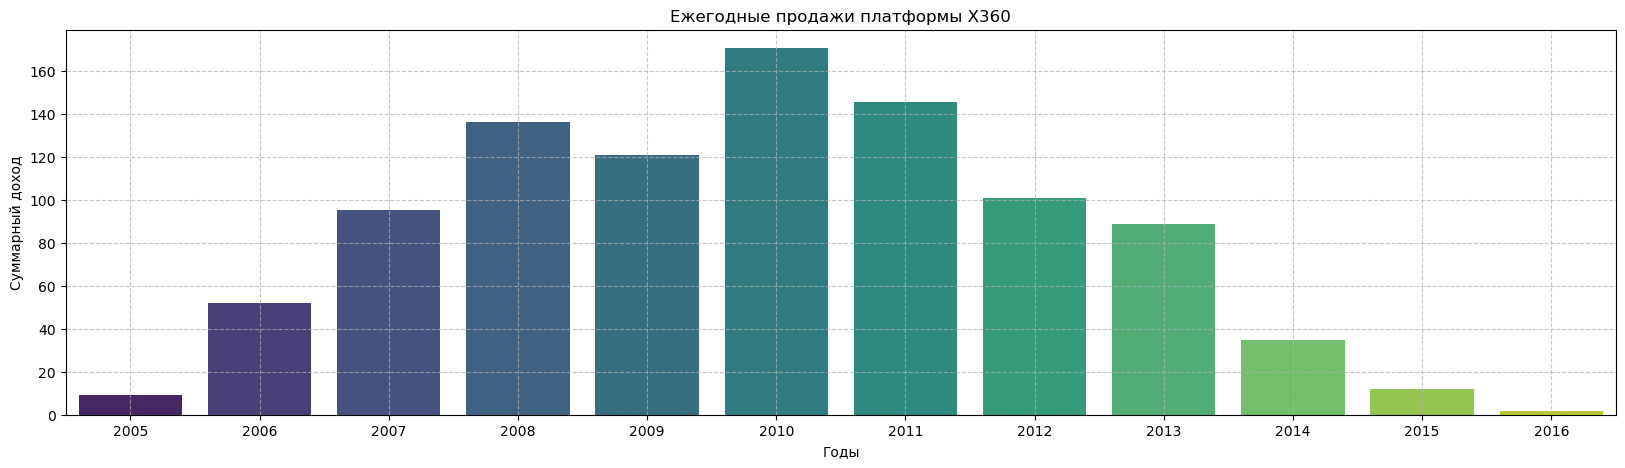

In [51]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data_x360, palette='viridis')

plt.title('Ежегодные продажи платформы X360')
plt.xlabel('Годы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Максимальные продажи отмечались в 2008, 2010, 2012 и 2013гг. Платформа существовала 12 лет.

Платформа существует от 9 до 12 лет, принося минимальный доход в последние 2 года.Поэтому для прогнозирования доходов на 2017 год наиболее актуальным для анализа будет период 2014-2016 гг (можно выделить наиболее доходные платформы за этот период и посмотреть динамику, растут или уменьшаются их продажи)

### Оценка продаж в 2014-2016 гг

In [52]:
# оставим для дальнейшего анализа только данные за последние 3 года
data = data[data['year_of_release']>= 2014]

In [53]:
total_sales_by_platform = data.groupby(['platform'])['total_sales'].sum().reset_index()
total_sales_by_platform = total_sales_by_platform.sort_values(by='total_sales')
total_sales_by_platform

,platform,total_sales
4,PSP,0.36
6,Wii,5.07
5,PSV,22.40
1,PC,27.40
7,WiiU,42.98
8,X360,48.22
2,PS3,68.18
0,3DS,86.68
9,XOne,140.36
3,PS4,288.15


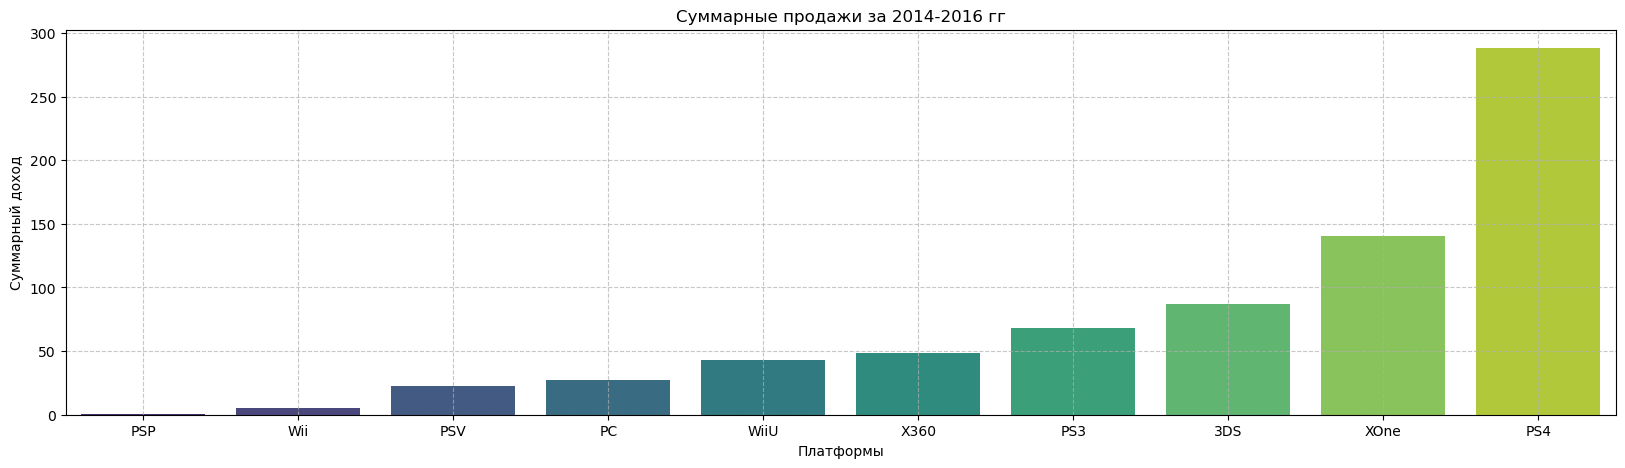

In [54]:
plt.figure(figsize=(20, 5))
sns.barplot(x='platform', y='total_sales', data=total_sales_by_platform, palette='viridis')

plt.title('Суммарные продажи за 2014-2016 гг')
plt.xlabel('Платформы')
plt.ylabel('Суммарный доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам за последние 3 года платформы PS4, XOne, 3DS, PS3. Проследим динамику продаж компьютерных игр разных платформ за последние 3 года.

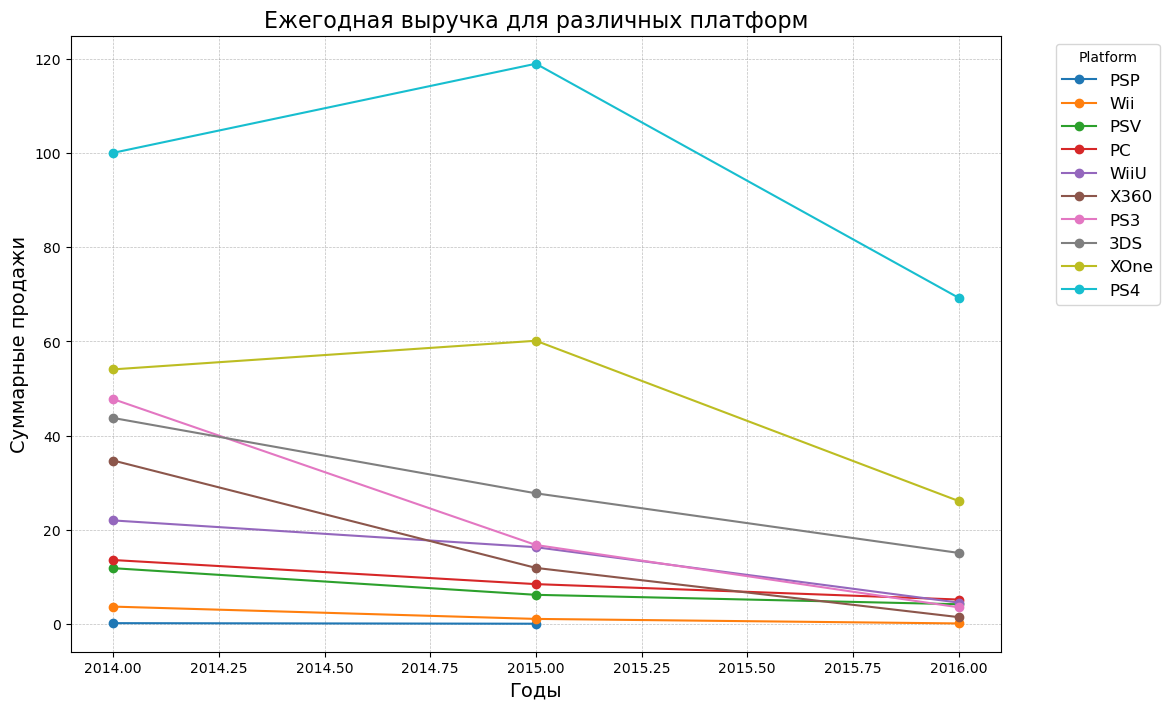

In [55]:
platforms_of_interest = total_sales_by_platform['platform']


plt.figure(figsize=(12, 8))

for platform in platforms_of_interest:
    platform_data = data[data['platform'] == platform]
    total_sales_by_platform = platform_data.groupby('year_of_release')['total_sales'].sum().reset_index()
    plt.plot(total_sales_by_platform['year_of_release'], total_sales_by_platform['total_sales'], label=platform, marker='o')


plt.xlabel('Годы', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)

plt.title('Ежегодная выручка для различных платформ', fontsize=16)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(title='Platform', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Лидеры продаж - платформы PS4, XOne, 3DS. Продажи всех платформ имеют тенденцию к падению (как и в целом продажи компьютерных игр). Их же можно считать потенциально прибыльными  (с учетом общей тенденции продажи этих платформ ожидаемо будут выше остальных).

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

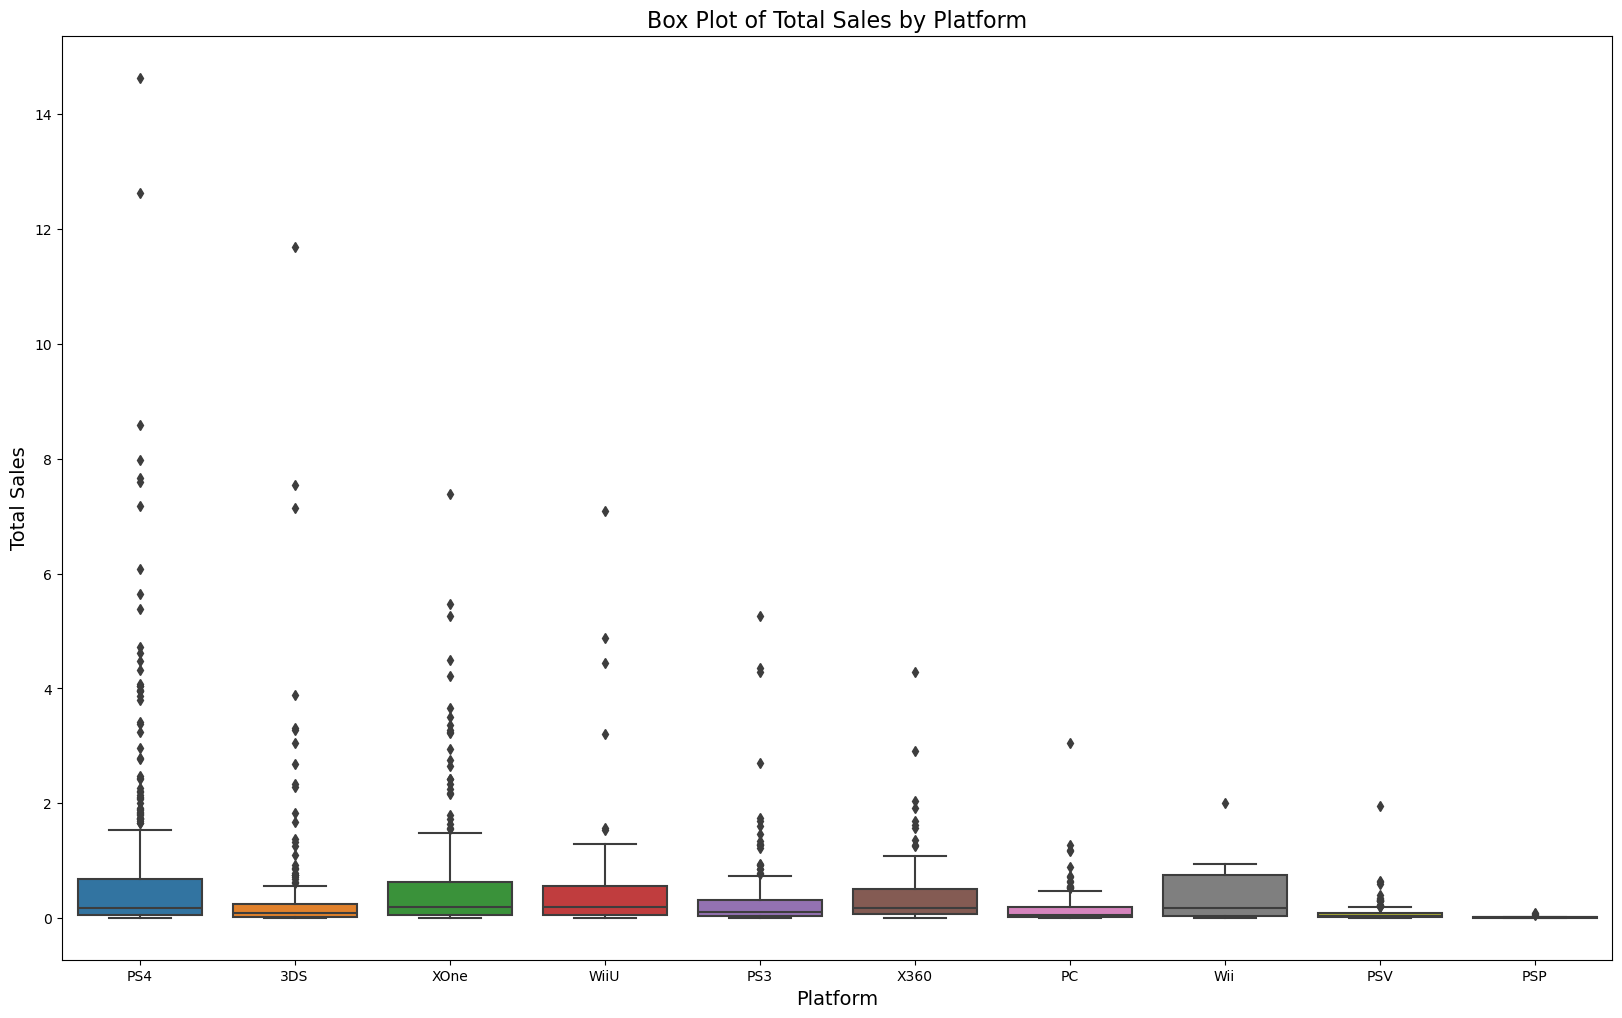

In [56]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='platform', y='total_sales', data=data)

plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Box Plot of Total Sales by Platform', fontsize=16)
plt.show()

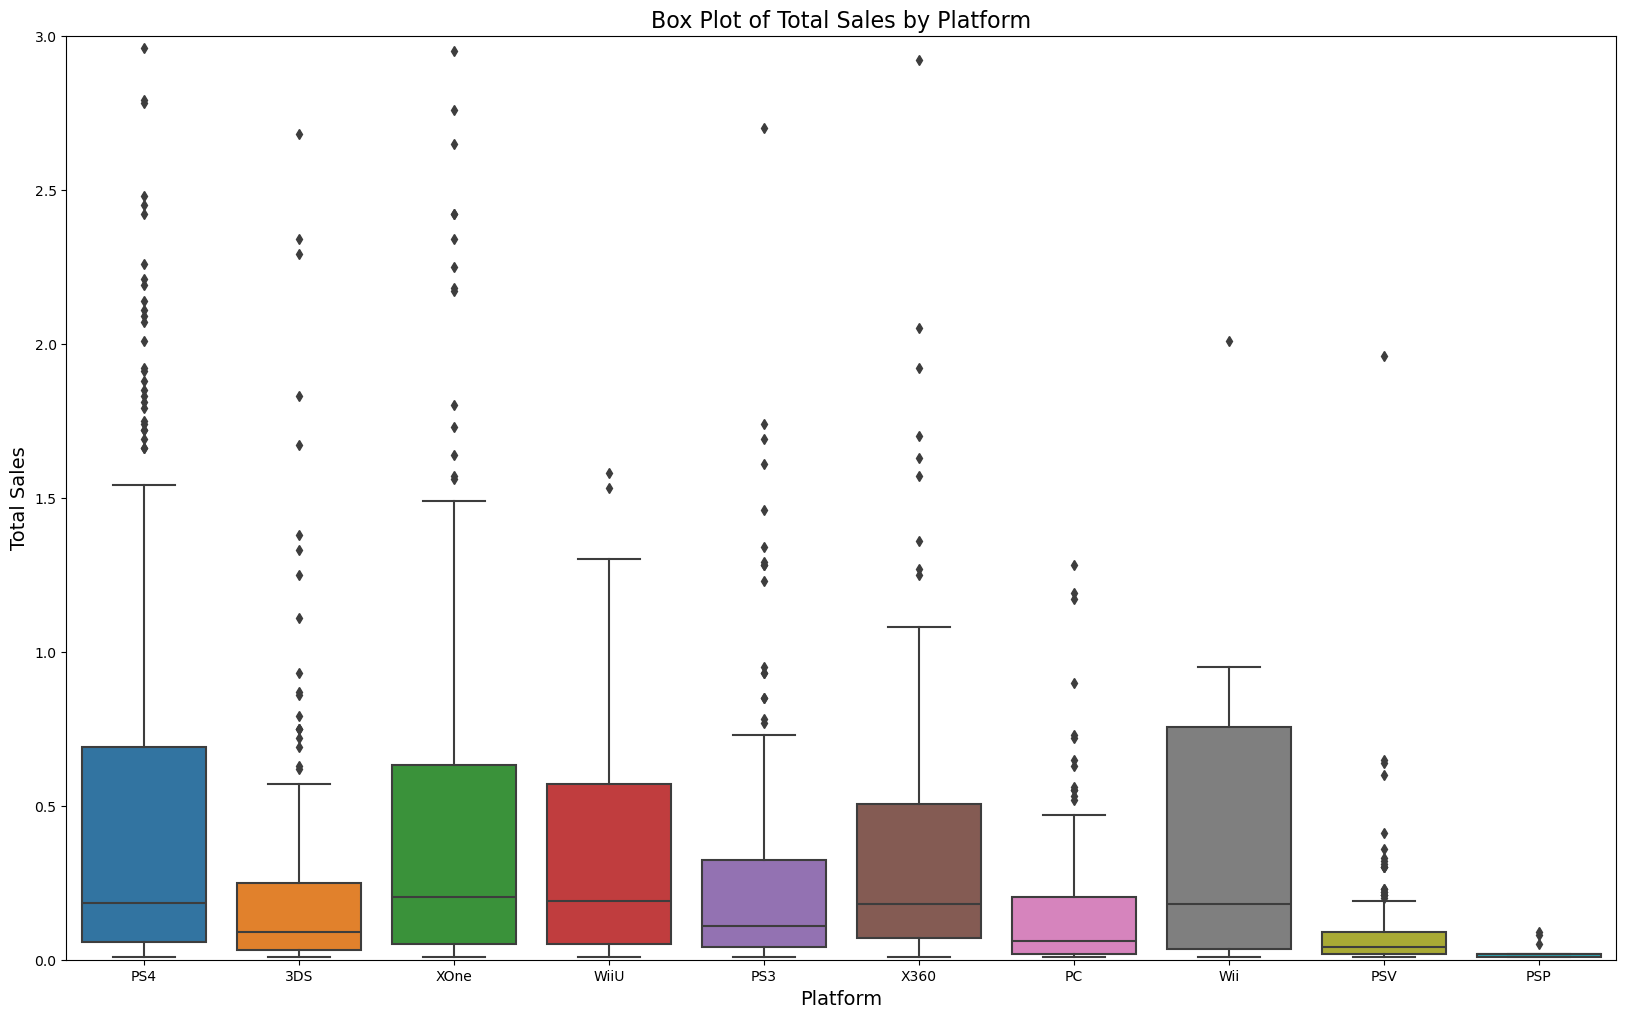

In [57]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='platform', y='total_sales', data=data)

plt.ylim(0, 3)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Box Plot of Total Sales by Platform', fontsize=16)
plt.show()

- Платформы PS4, XOne, WiiU имеют высокие медианные продажи, широкий межквартильный интервал и многочисленные выбросы, что, вероятно, свидетельствует о наличии как нескольких чрезвычайно успешных игр, так и менее успешных, а также говорит о значительном разбросе продаж.
- Платформа Wii имеет высокие медианные продажи, широкий межквартильный интервал и не имеет выбросов (более стабильные продажи).
- Платформа X360 имеет средние медианные продажи и многочисленные выбросы (продажи нестабильны).
- Платформы PC,3DS, PS3 имеют низкие медианные продажи и выбросы (вероятно, часть игр была очень успешной, особенно выбросы заметны для платформы 3DS).
- Платформа PSV имеет низкие медианные продажи и выбросы (вероятно, несколько игр успешно продавались).
- Платформы ХВ и PSP имеют самые низкие продажи.

### Влияние на продажи популярных платформ отзывов пользователей и критиков

**Проанализируем продажи игр на платформах PS4, PS3, XOne, X360,3DS (лидеры продаж ро итогам 2014-2016 гг)**

PS4 - Корреляция между пользовательскими отзывами и продажами: -0.04
PS4 - Корреляция между отзывами критиков и продажами: 0.40
PS3 - Корреляция между пользовательскими отзывами и продажами: 0.16
PS3 - Корреляция между отзывами критиков и продажами: 0.45
XOne - Корреляция между пользовательскими отзывами и продажами: -0.09
XOne - Корреляция между отзывами критиков и продажами: 0.42
X360 - Корреляция между пользовательскими отзывами и продажами: 0.34
X360 - Корреляция между отзывами критиков и продажами: 0.53
3DS - Корреляция между пользовательскими отзывами и продажами: 0.28
3DS - Корреляция между отзывами критиков и продажами: 0.28


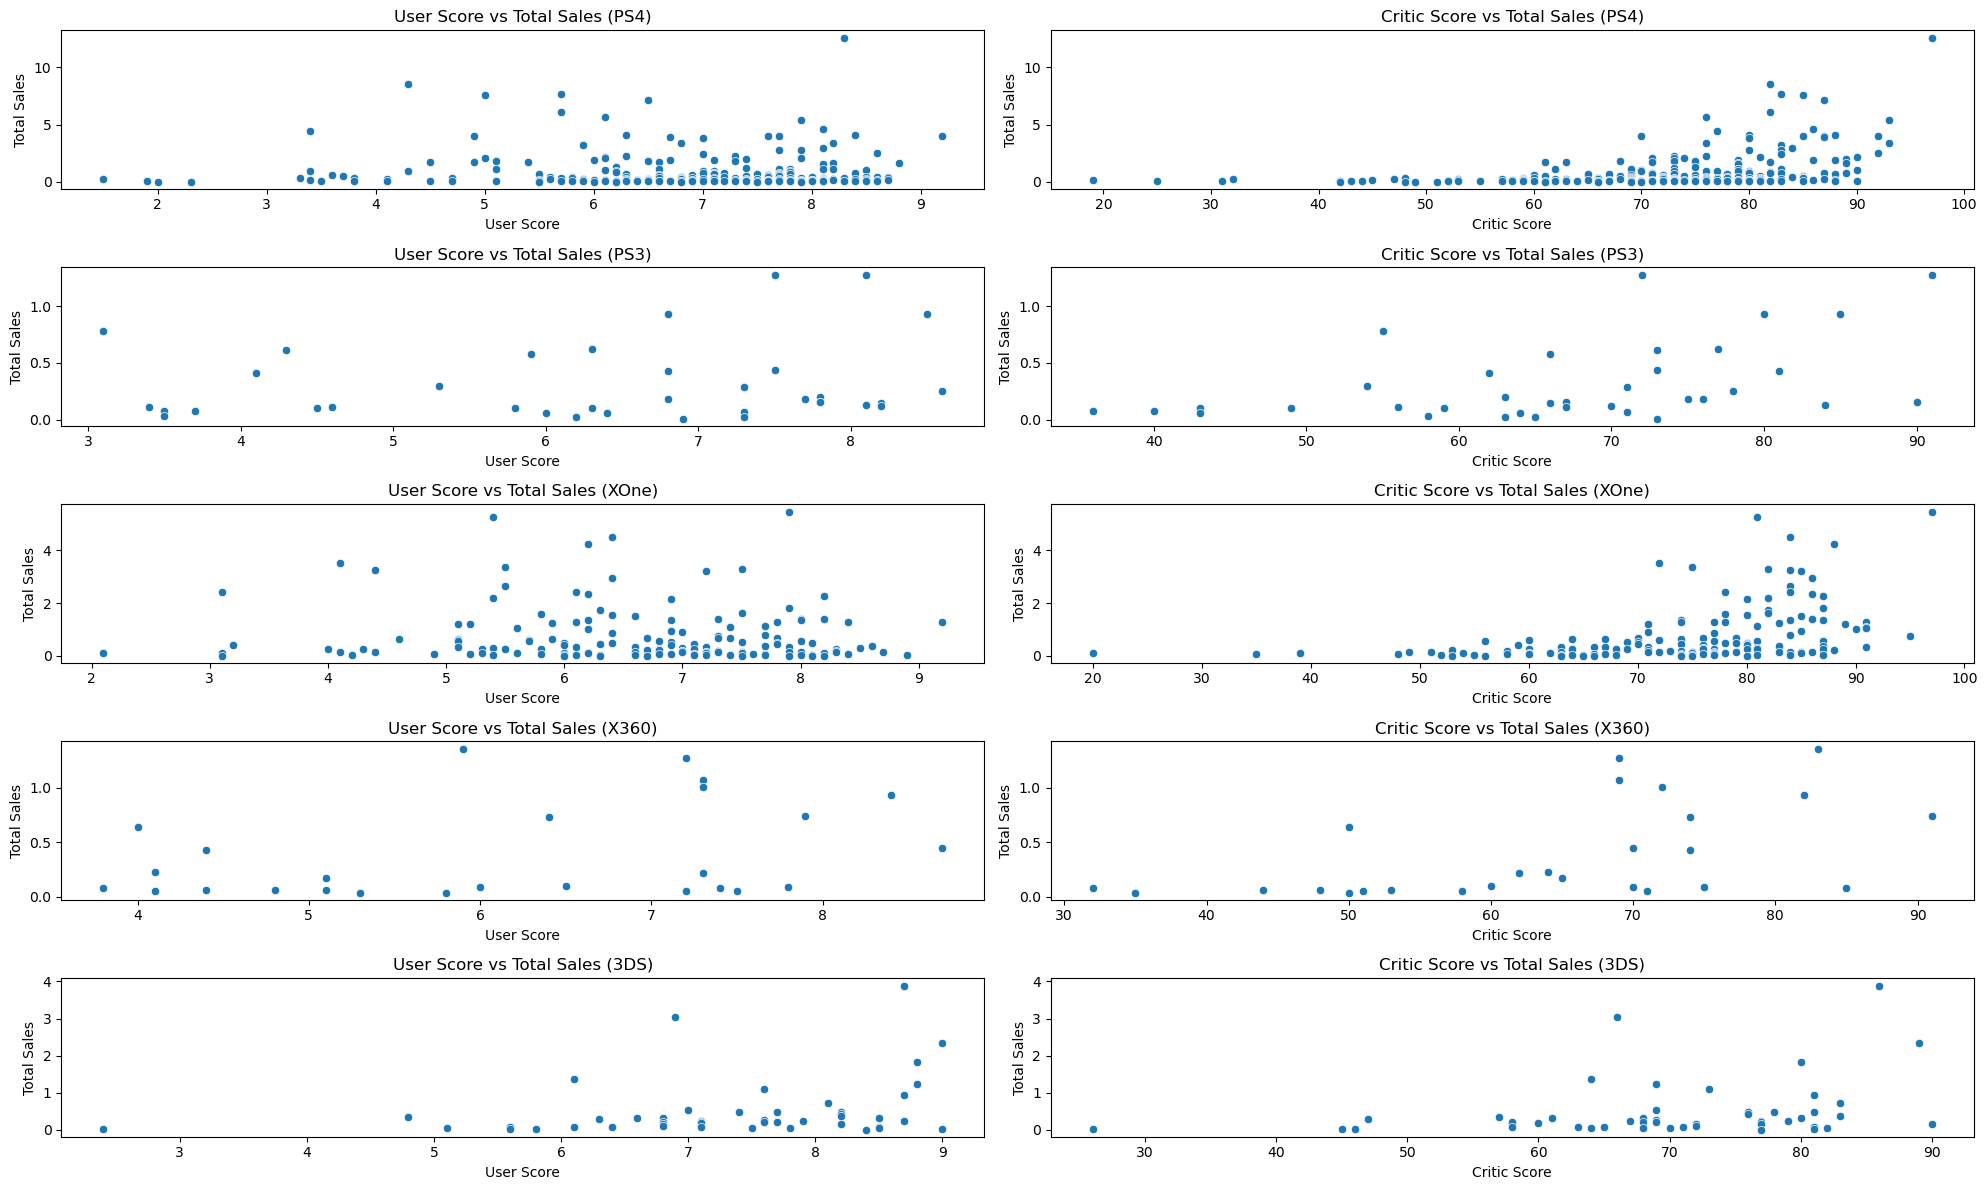

In [58]:
# создадим список пяти популярных платформ
popular_platforms = ['PS4', 'PS3', 'XOne', 'X360','3DS']
# отфильтруем часть датафрейма с реальными отзывами пользователей и критиков(без значений заглушек)
data_score = data[(data['user_score'] != -1) &(data['critic_score'] != -1)]

# построим диаграммы рассеяния и рассчитаем коэффициент корреляции для каждой платформы
plt.figure(figsize=(20, 12))

for i, platform in enumerate(popular_platforms):
    platform_data = data_score[data_score['platform'] == platform]

    # диаграмма рассеяния для пользовательских оценок и продаж
    plt.subplot(5, 2, 2*i + 1)
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.xlabel('User Score')
    plt.ylabel('Total Sales')
    plt.title(f'User Score vs Total Sales ({platform})')

    # Диаграмма рассеяния для оценок критиков и продаж
    plt.subplot(5, 2, 2*i + 2)
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales')
    plt.title(f'Critic Score vs Total Sales ({platform})')

    # Расчет корреляции
    user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

    print(f'{platform} - Корреляция между пользовательскими отзывами и продажами: {user_score_corr:.2f}')
    print(f'{platform} - Корреляция между отзывами критиков и продажами: {critic_score_corr:.2f}')

plt.tight_layout()
plt.show()

Прослеживается закономерность: присутствует положительная корреляция продаж и отзывов критиков ( коэффициент корреляции 0,4-0,53 на платформах, кроме 3DS (0,28)).Зависимость продаж от отзывов пользователей ниже- коэффициент корреляции близок к 0 для платформ PS4, PS3, XOne, немного выше для платформ X360 и 3DS (около 0,3). 

Таким образом, отзывы критиков для продаж более важны, чем отзывы пользователей.

### Распределение игр и продаж по жанрам

In [59]:
data_genre_names = data.groupby('genre')['name'].count().reset_index()
data_genre_names = data_genre_names.sort_values(by='name')
data_genre_names

,genre,name
5,Puzzle,14
11,Strategy,37
4,Platform,38
9,Simulation,44
2,Fighting,60
6,Racing,69
3,Misc,113
8,Shooter,128
10,Sports,161
1,Adventure,185


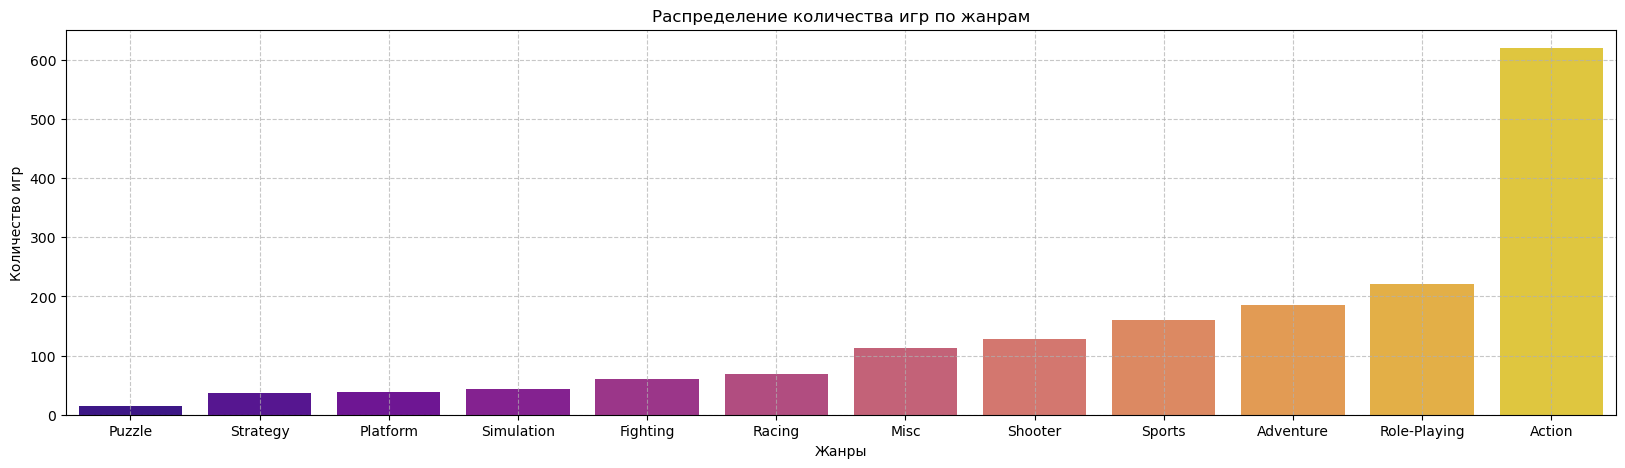

In [60]:
plt.figure(figsize=(20, 5))
sns.barplot(x='genre', y='name', data=data_genre_names, palette='plasma')

plt.title('Распределение количества игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Лидеры по количеству выпущенных игр - жанры Action (выпущено более 600 игр в этом жанре), Role-Playing, Adventure, Sports, Shooter. 

In [61]:
data_genre_sales = data.groupby('genre')['total_sales'].sum().reset_index()
data_genre_sales

,genre,total_sales
0,Action,199.71
1,Adventure,17.55
2,Fighting,28.22
3,Misc,37.55
4,Platform,18.09
5,Puzzle,2.21
6,Racing,27.52
7,Role-Playing,101.44
8,Shooter,170.94
9,Simulation,13.13


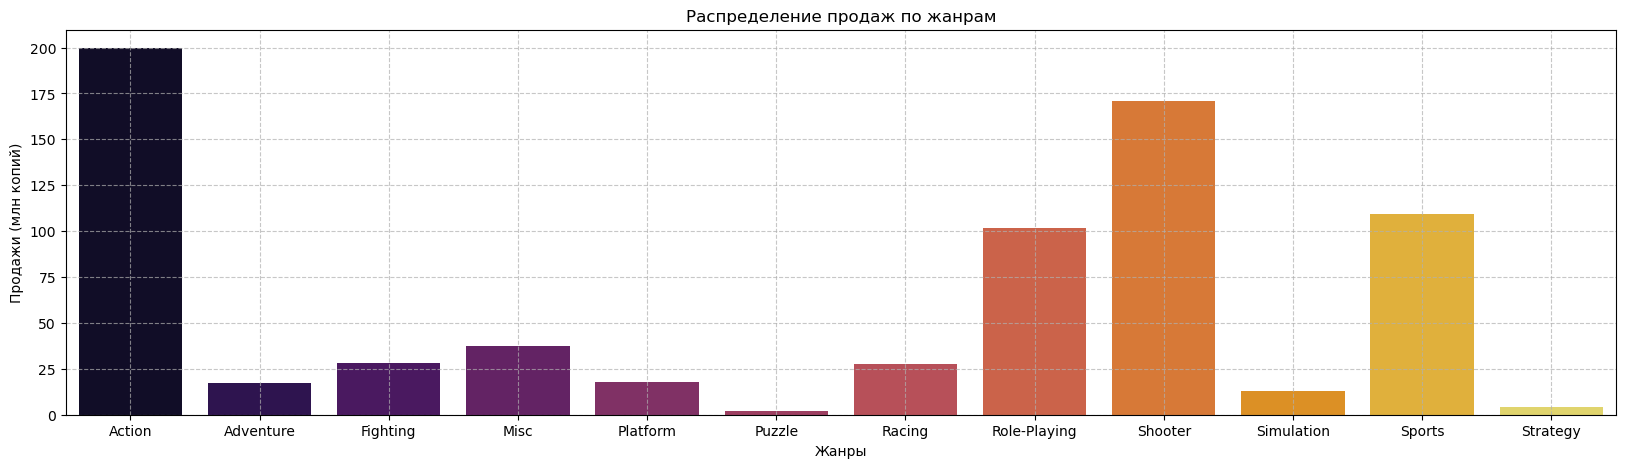

In [62]:
plt.figure(figsize=(20, 5))
sns.barplot(x='genre', y='total_sales', data=data_genre_sales, palette='inferno')

plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи (млн копий)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам жанры Action, Shooter, Sports, Role-Playing.

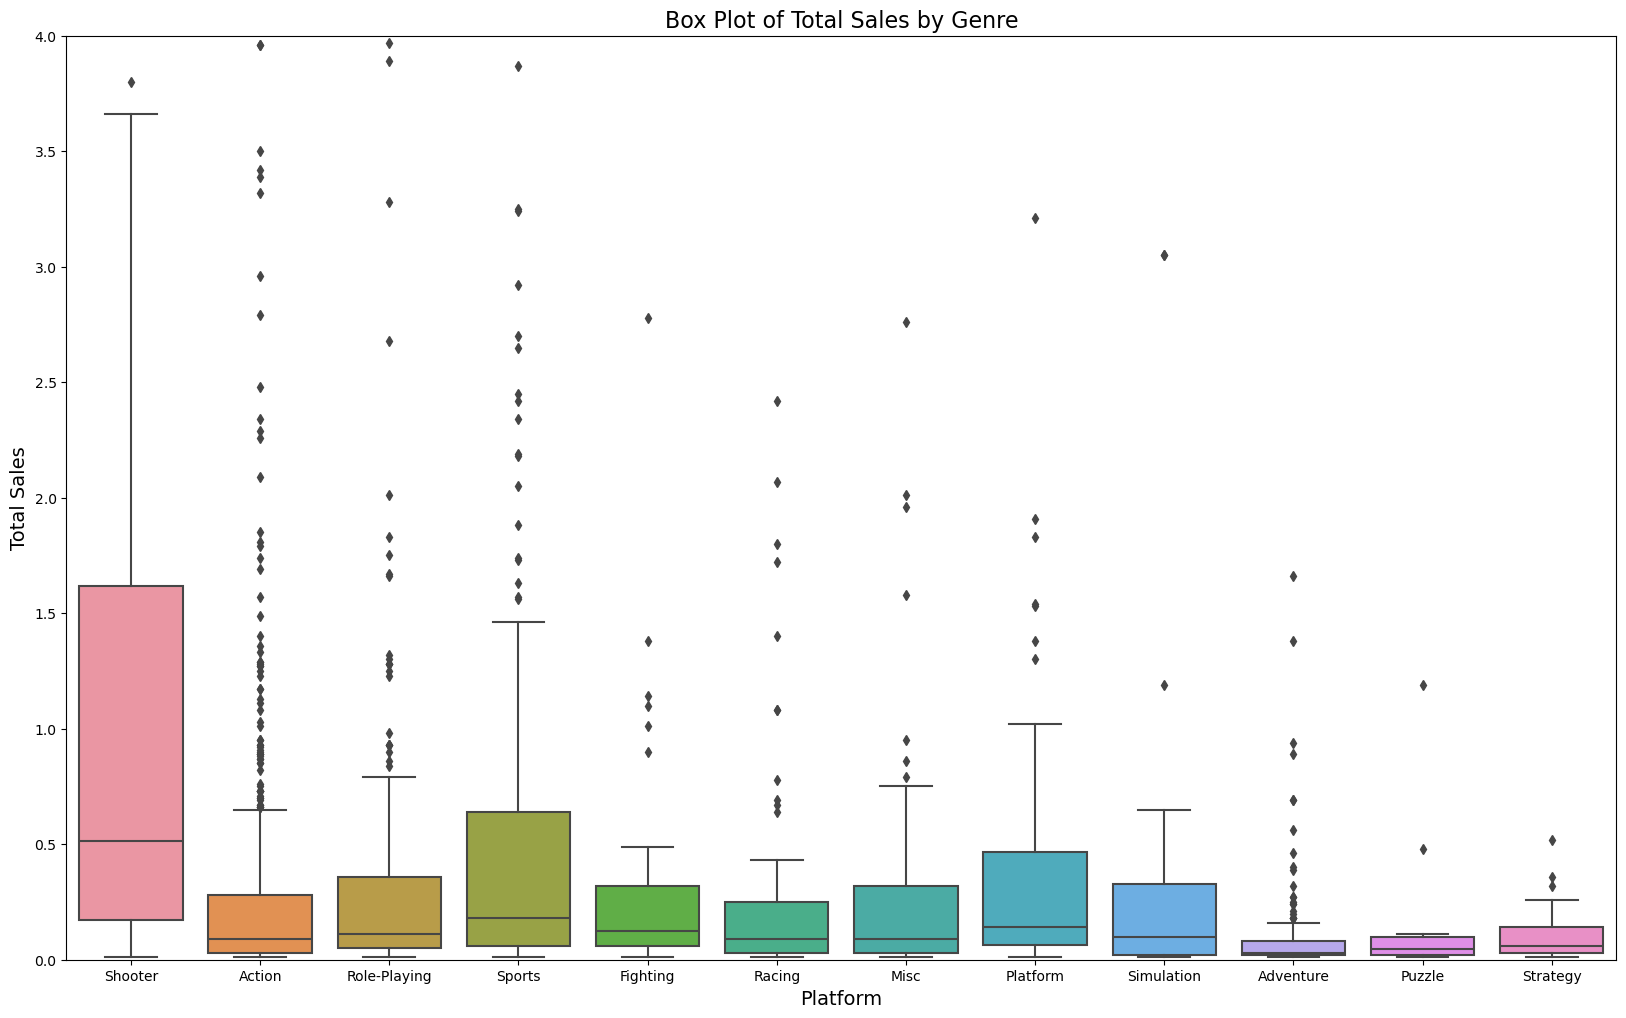

In [63]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='genre', y='total_sales', data=data)

plt.ylim(0, 4)

plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Box Plot of Total Sales by Genre', fontsize=16)
plt.show()

- Самые высокие медианные продажи у жанра Shooter. Широкий межквартильный интервал может говорить о том, что продажи значительно варьируются среди игр или платформ в рассматриваемом жанре. Наличие выбросов свидетельствует о наличии особенно успешно продаваемых игр в этом жанре.
- Остальные жанры сильно отстают по медианным продажам.
- Практически отсутствуют выбросы в жанре Simulation, что свидетельствует о стабильности продаж.
- Больше всего выбросов в жанре Action (при малых медианных продажах, видимо, выпускались серии игр с особенно успешными продажами).

## Портрет пользователя каждого региона

### Северная Америка

#### Распределение продаж по платформам

In [64]:
data_platforms_na = data.groupby('platform')['na_sales'].sum().reset_index()
total_sales_na = data_platforms_na['na_sales'].sum()
data_platforms_na['percent_sales'] = (data_platforms_na['na_sales']/total_sales_na)*100
data_platforms_na = data_platforms_na.sort_values(by='percent_sales')
data_platforms_na

,platform,na_sales,percent_sales
4,PSP,0.00,0.000000
6,Wii,2.08,0.732085
5,PSV,2.52,0.886949
1,PC,7.29,2.565817
7,WiiU,19.36,6.814022
2,PS3,22.05,7.760805
0,3DS,22.64,7.968464
8,X360,28.30,9.960580
9,XOne,81.27,28.604111
3,PS4,98.61,34.707166


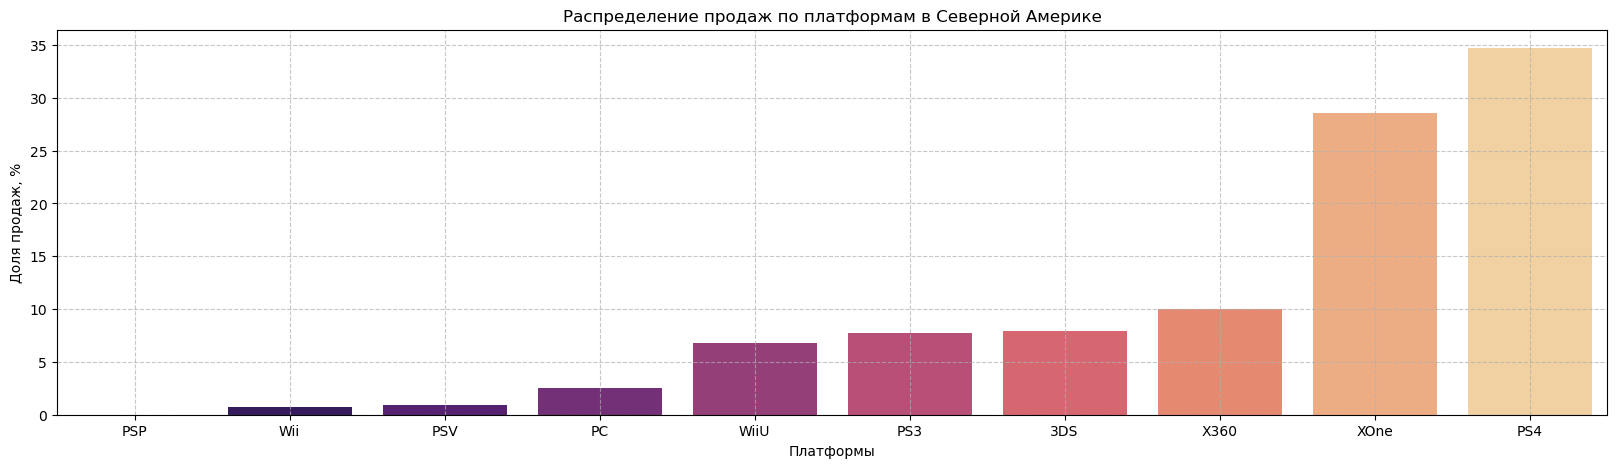

In [65]:
plt.figure(figsize=(20, 5))
sns.barplot(x='platform', y='percent_sales', data=data_platforms_na, palette='magma')

plt.title('Распределение продаж по платформам в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Доля продаж, %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам в Северной Америке платформы PS4 (34,45%), XOne (28,39%), X360 (9,89%). Суммарно они обеспечили 72,73% всех продаж по региону.  

#### Распределение продаж по жанрам

In [66]:
data_genres_na = data.groupby('genre')['na_sales'].sum().reset_index()
total_sales_na = data_genres_na['na_sales'].sum()
data_genres_na['percent_sales'] = (data_genres_na['na_sales']/total_sales_na)*100
data_genres_na = data_genres_na.sort_values(by='percent_sales')
data_genres_na

,genre,na_sales,percent_sales
5,Puzzle,0.65,0.228777
11,Strategy,0.98,0.344925
9,Simulation,2.63,0.925665
1,Adventure,5.64,1.985077
4,Platform,6.79,2.389835
6,Racing,8.74,3.076165
2,Fighting,12.43,4.374912
3,Misc,15.05,5.297058
7,Role-Playing,33.47,11.780234
10,Sports,46.13,16.236097


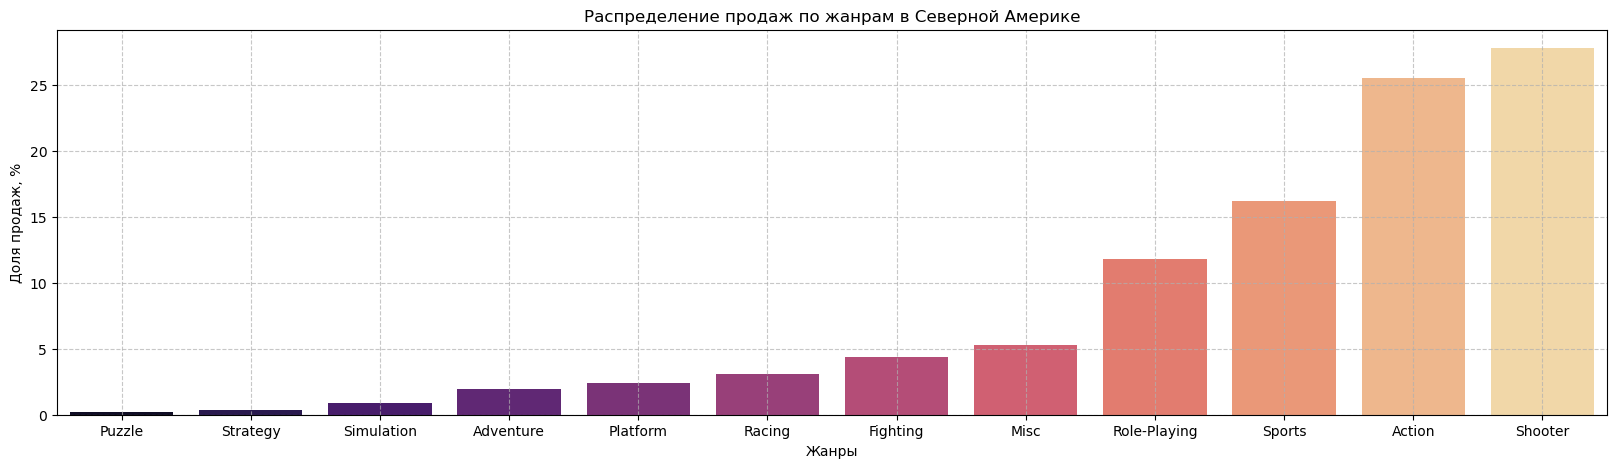

In [67]:
plt.figure(figsize=(20, 5))
sns.barplot(x='genre', y='percent_sales', data=data_genres_na, palette='magma')

plt.title('Распределение продаж по жанрам в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Доля продаж, %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам в Северной Америке жанры Shooter (28,22%), Action (25,49%), Sports (16,12%), Role_Playing (11,7%). Суммарно эти жанры обеспечили 81,53% всех продаж.

#### Распределение продаж по рейтингу ESRB

In [68]:
data_rating_na = data.groupby('rating')['na_sales'].sum().reset_index()
data_rating_na

,rating,na_sales
0,E,50.76
1,E10+,34.61
2,M,104.32
3,T,40.28
4,unknown,54.15


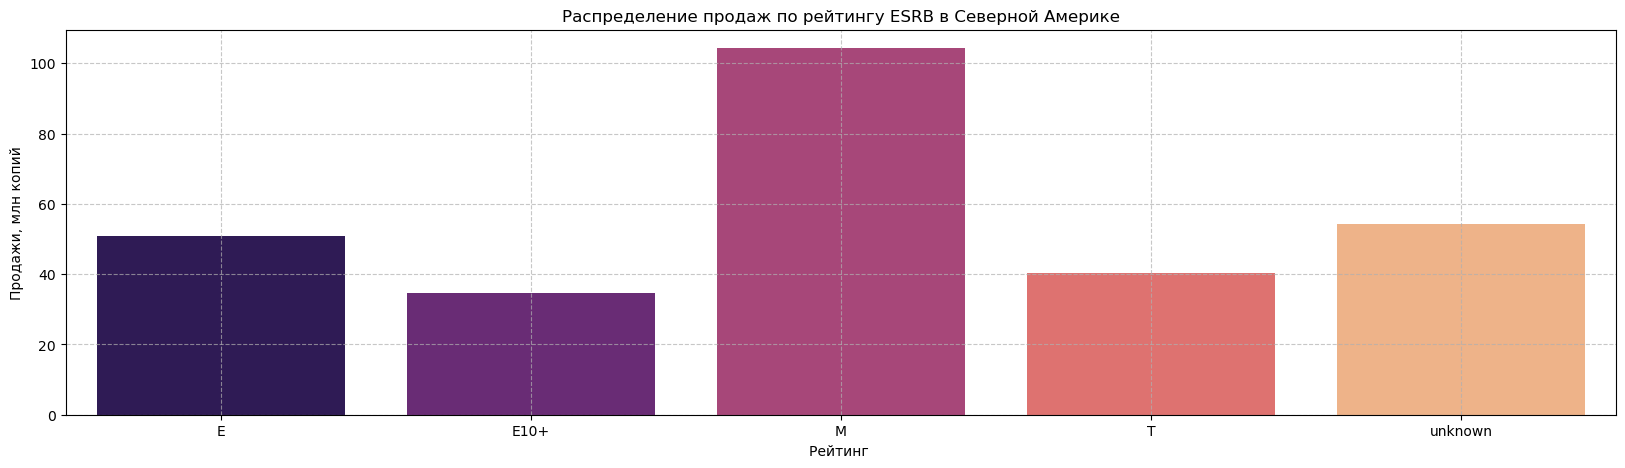

In [69]:
plt.figure(figsize=(20, 5))
sns.barplot(x='rating', y='na_sales', data=data_rating_na, palette='magma')

plt.title('Распределение продаж по рейтингу ESRB в Северной Америке')
plt.xlabel('Рейтинг ')
plt.ylabel('Продажи, млн копий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Лидеры продаж в Северной Америке - игры категории M (Mature, игры, подходящие для взрослых от 17 лет и старше).
Категории E (Everyone, игры, подходящие для всех возрастов от 6 лет), E10+ (Everyone 10 and older – Для всех от 10 лет и старше) и  T (Teen, игры, подходящие для подростков от 13 лет и старше) продаются примерно одинаково. 

**Таким образом,** 
- наибольшей популярностью в Северной Америке пользуются игры на платформах PS4, XOne, X360,
- самые популярные жанры игр Shooter, Action, Sports, Role_Playing,
- основная категория пользователей - взрослые от 17 лет и старше.

### Европа

#### Распределение продаж по платформам

In [70]:
data_platforms_eu = data.groupby('platform')['eu_sales'].sum().reset_index()
total_sales_eu = data_platforms_eu['eu_sales'].sum()
data_platforms_eu['percent_sales'] = (data_platforms_eu['eu_sales']/total_sales_eu)*100
data_platforms_eu = data_platforms_eu.sort_values(by='percent_sales')
data_platforms_eu

,platform,eu_sales,percent_sales
4,PSP,0.00,0.000000
6,Wii,2.59,0.955966
5,PSV,3.53,1.302920
7,WiiU,13.15,4.853652
8,X360,15.49,5.717344
0,3DS,16.12,5.949876
1,PC,18.22,6.724984
2,PS3,25.54,9.426789
9,XOne,46.25,17.070830
3,PS4,130.04,47.997638


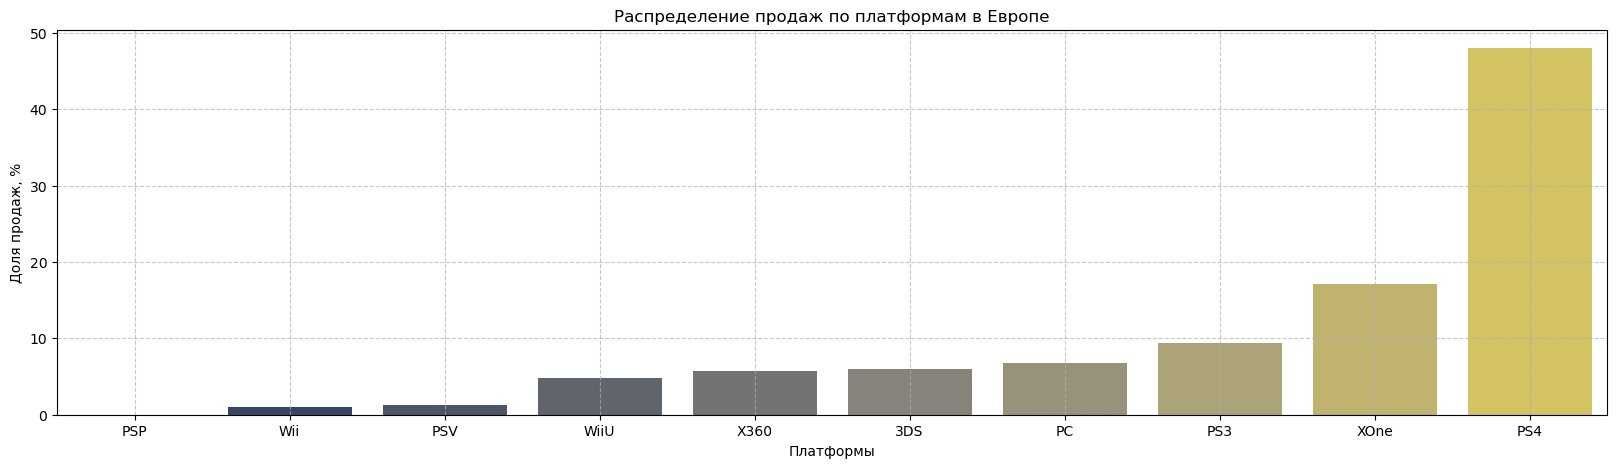

In [71]:
plt.figure(figsize=(20, 5))
sns.barplot(x='platform', y='percent_sales', data=data_platforms_eu, palette='cividis')

plt.title('Распределение продаж по платформам в Европе')
plt.xlabel('Платформы')
plt.ylabel('Доля продаж, %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам в Европе платформы PS4 (47,67%), XOne (16,95%) PS3 (9,36%). Суммарно они обеспечили 73,98% всех продаж по региону

#### Распределение продаж по жанрам

In [72]:
data_genres_eu = data.groupby('genre')['eu_sales'].sum().reset_index()
total_sales_eu = data_genres_eu['eu_sales'].sum()
data_genres_eu['percent_sales'] = (data_genres_eu['eu_sales']/total_sales_eu)*100
data_genres_eu = data_genres_eu.sort_values(by='percent_sales')
data_genres_eu

,genre,eu_sales,percent_sales
5,Puzzle,0.52,0.191931
11,Strategy,1.79,0.660687
1,Adventure,6.49,2.395453
2,Fighting,6.69,2.469273
4,Platform,6.80,2.509873
9,Simulation,7.30,2.694423
3,Misc,12.86,4.746614
6,Racing,14.13,5.215369
7,Role-Playing,28.17,10.397520
10,Sports,45.73,16.878899


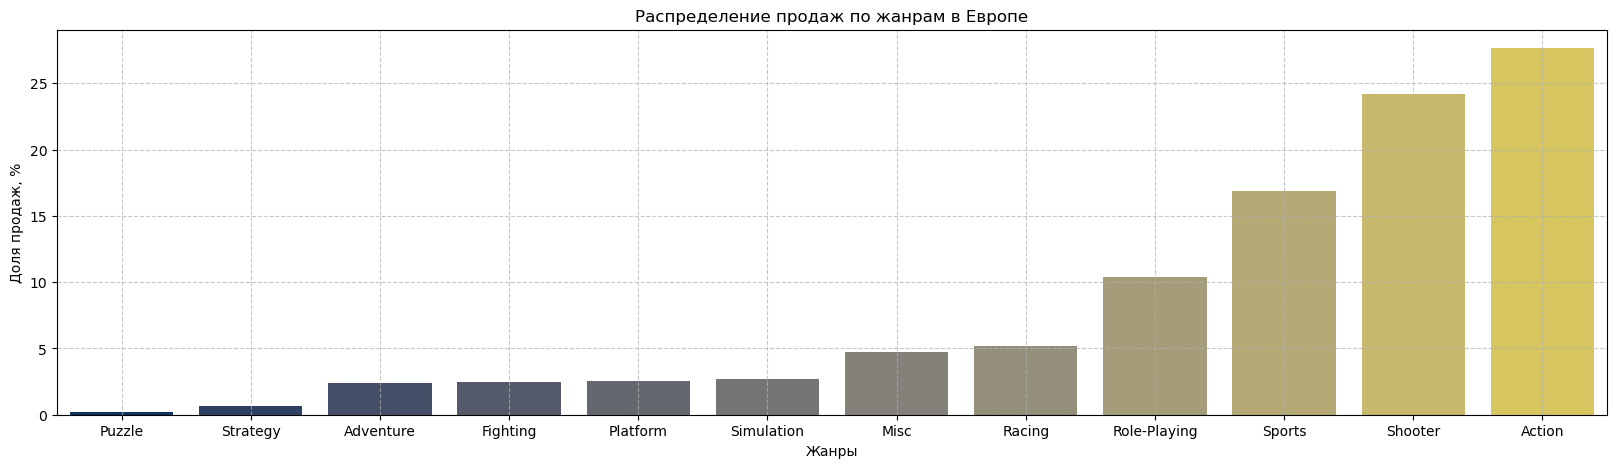

In [73]:
plt.figure(figsize=(20, 5))
sns.barplot(x='genre', y='percent_sales', data=data_genres_eu, palette='cividis')

plt.title('Распределение продаж по жанрам в Европе')
plt.xlabel('Жанры')
plt.ylabel('Доля продаж, %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам в Европе жанры Action (27,55%), Shooter (24,62%),Sports (16,76%), Role_Playing (10,33%).  Суммарно эти жанры обеспечили 79,26% всех продаж.

#### Распределение продаж по рейтингу ESRB

In [74]:
data_rating_eu = data.groupby('rating')['eu_sales'].sum().reset_index()
data_rating_eu

,rating,eu_sales
0,E,58.27
1,E10+,27.56
2,M,102.10
3,T,35.33
4,unknown,47.67


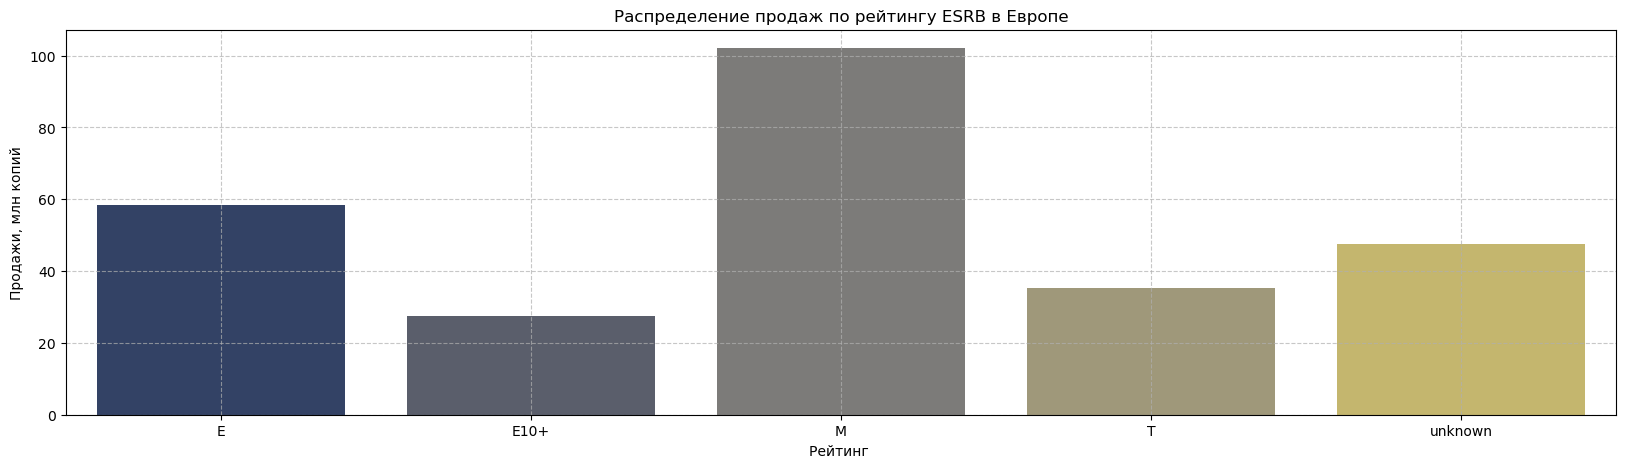

In [75]:
plt.figure(figsize=(20, 5))
sns.barplot(x='rating', y='eu_sales', data=data_rating_eu, palette='cividis')

plt.title('Распределение продаж по рейтингу ESRB в Европе')
plt.xlabel('Рейтинг ')
plt.ylabel('Продажи, млн копий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Лидеры продаж в Европе - игры категории M (Mature, игры, подходящие для взрослых от 17 лет и старше).
Категории E (Everyone, игры, подходящие для всех возрастов от 6 лет), E10+ (Everyone 10 and older – Для всех от 10 лет и старше) и  T (Teen, игры, подходящие для подростков от 13 лет и старше) продаются примерно одинаково.  

**Таким образом,** 
- наибольшей популярностью в Европе пользуются игры на платформах PS4, XOne, PS3,
- самые популярные жанры игр Shooter, Action, Sports, Role_Playing,
- основная категория пользователей - взрослые от 17 лет и старше.

### Япония

#### Распределение продаж по платформам

In [76]:
data_platforms_jp = data.groupby('platform')['jp_sales'].sum().reset_index()
total_sales_jp = data_platforms_jp['jp_sales'].sum()
data_platforms_jp['percent_sales'] = (data_platforms_jp['jp_sales']/total_sales_jp)*100
data_platforms_jp = data_platforms_jp.sort_values(by='percent_sales')
data_platforms_jp

,platform,jp_sales,percent_sales
1,PC,0.00,0.000000
6,Wii,0.00,0.000000
8,X360,0.08,0.085938
9,XOne,0.32,0.343753
4,PSP,0.36,0.386723
7,WiiU,7.31,7.852616
2,PS3,11.22,12.052852
5,PSV,14.54,15.619293
3,PS4,15.02,16.134923
0,3DS,44.24,47.523902


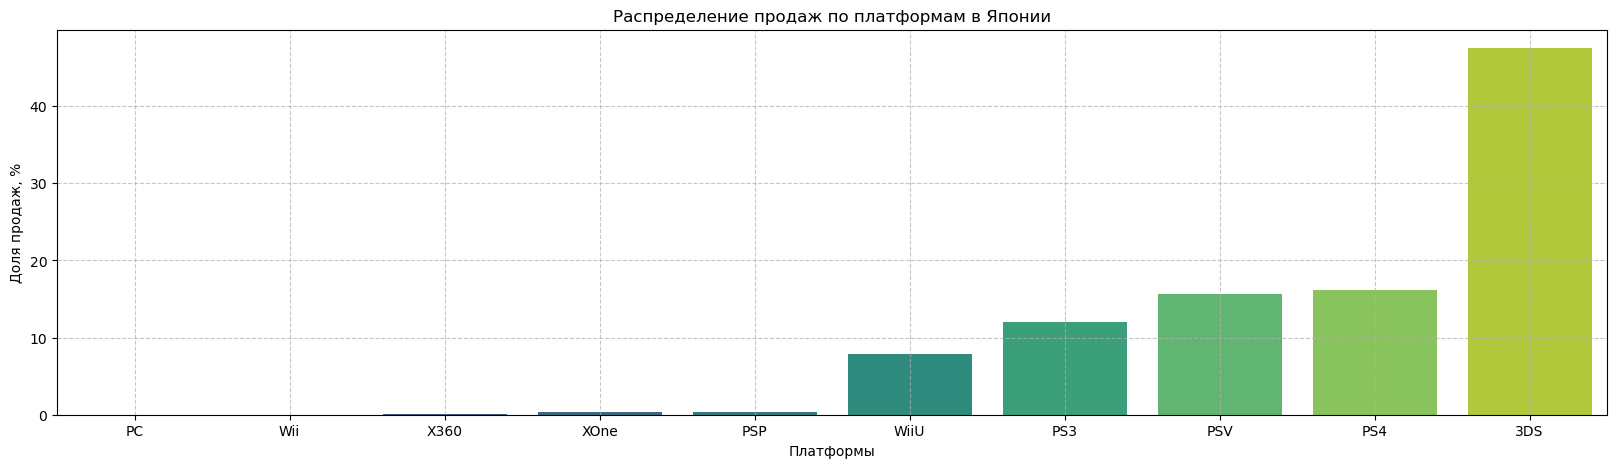

In [77]:
plt.figure(figsize=(20, 5))
sns.barplot(x='platform', y='percent_sales', data=data_platforms_jp, palette='viridis')

plt.title('Распределение продаж по платформам в Японии')
plt.xlabel('Платформы')
plt.ylabel('Доля продаж, %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам в Японии платформы 3DS (47,53%), PS4 (16,13%), PSV (15,62%) Суммарно они обеспечили 79,28% всех продаж по региону

#### Распределение продаж по жанрам

In [78]:
data_genres_jp = data.groupby('genre')['jp_sales'].sum().reset_index()
total_sales_jp = data_genres_jp['jp_sales'].sum()
data_genres_jp['percent_sales'] = (data_genres_jp['jp_sales']/total_sales_jp)*100
data_genres_jp = data_genres_jp.sort_values(by='percent_sales')
data_genres_jp

,genre,jp_sales,percent_sales
5,Puzzle,0.93,0.999033
11,Strategy,0.95,1.020518
6,Racing,1.76,1.890643
9,Simulation,2.31,2.481470
4,Platform,2.69,2.889677
10,Sports,3.26,3.501987
1,Adventure,3.60,3.867225
8,Shooter,4.87,5.231496
3,Misc,5.61,6.026426
2,Fighting,6.37,6.842840


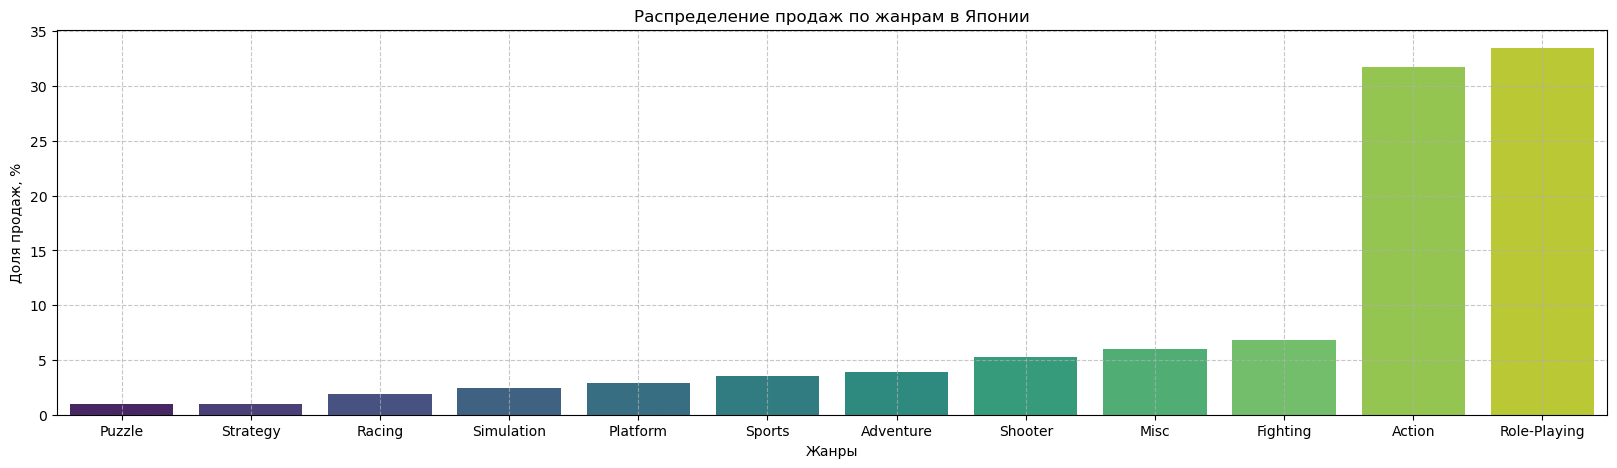

In [79]:
plt.figure(figsize=(20, 5))
sns.barplot(x='genre', y='percent_sales', data=data_genres_jp, palette='viridis')

plt.title('Распределение продаж по жанрам в Японии')
plt.xlabel('Жанры')
plt.ylabel('Доля продаж, %')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Среди лидеров по продажам в Японии жанры Role-Playing (33,47%), Action (31,77%). Суммарно эти жанры обеспечили 65,24% всех продаж. 

#### Распределение продаж по рейтингу ESRB

In [80]:
data_rating_jp = data.groupby('rating')['jp_sales'].sum().reset_index()
data_rating_jp

,rating,jp_sales
0,E,8.98
1,E10+,4.77
2,M,8.61
3,T,16.28
4,unknown,54.45


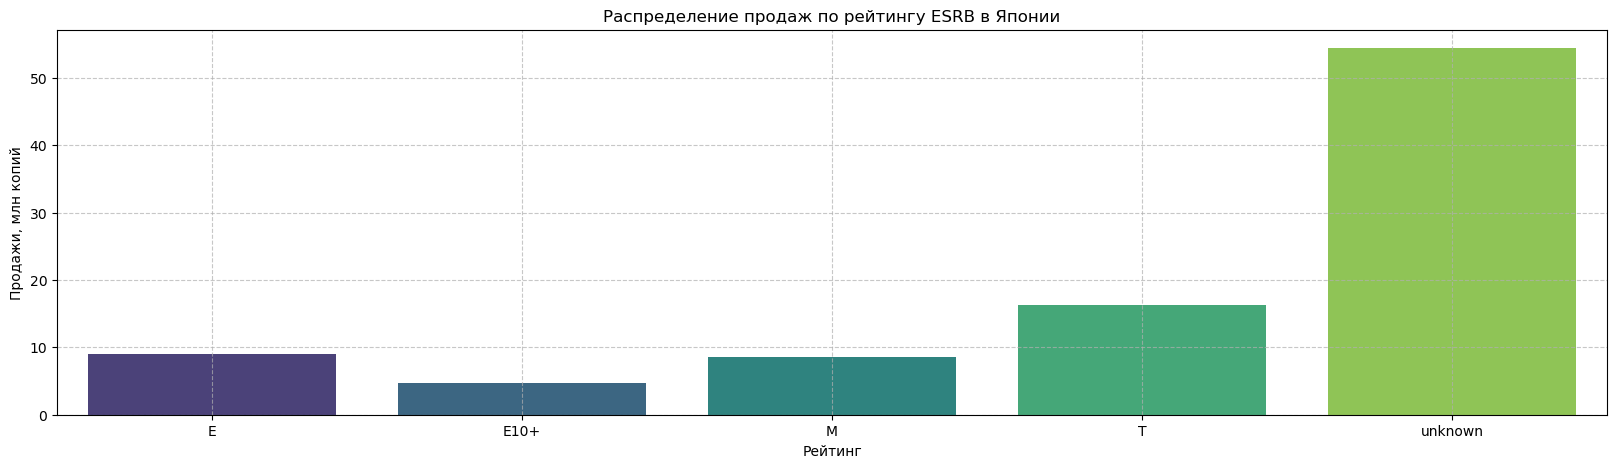

In [81]:
plt.figure(figsize=(20, 5))
sns.barplot(x='rating', y='jp_sales', data=data_rating_jp, palette='viridis')

plt.title('Распределение продаж по рейтингу ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн копий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Лидеры продаж в Японии - игры категории T (Teen, игры, подходящие для подростков от 13 лет и старше). Категории E (Everyone, игры, подходящие для всех возрастов от 6 лет), M (Mature, игры, подходящие для взрослых от 17 лет и старше) и T (Teen, игры, подходящие для подростков от 13 лет и старше) продаются примерно одинаково. Более 40% игр не имеют рейтинга, что говорит об отсутствии в регионе системы рейтинга. 

**Таким образом,** 
- наибольшей популярностью в Японии пользуются игры на платформах 3DS, PS4, PSV,
- самые продаваемые жанры игр Role-Playing и Action,
- основная категория пользователей - подростки от 13 лет и старше.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза(Н0) - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза (Н1) - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [82]:
# отфильтруем данные, чтобы не учитывать данные "заглушек" в столбце 'user_score' 
data = data[data['user_score'] != -1 ]

# разделим данные по указанным платформам
data_xone = data[data['platform'] == 'XOne']
data_pc = data[data['platform'] == 'PC']

#  извлечем пользовательские рейтинги для каждой платформы
rating_xone = data_xone['user_score']
rating_pc = data_pc['user_score']

# уровень значимости
alpha = 0.05

# проведем t-тест для проверки гипотезы о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(rating_xone,
                       rating_pc,
                        alternative = 'two-sided')

print('p-значение:', results.pvalue)
print('среднее значение рейтинга XBox One:',rating_xone.mean() )
print('среднее значение рейтинга PC:',rating_pc.mean() )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу не отвергаем')

p-значение: 0.1269024252036148
среднее значение рейтинга XBox One: 6.594545454545456
среднее значение рейтинга PC: 6.316260162601626
Нулевую гипотезу не отвергаем


На основании полученных данных предположение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не опровергается.Принимается нулевая гипотеза:средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза(Н0) - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза (Н1) - Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [83]:
# разделим данные по указанным платформам
data_action = data[data['genre'] == 'Action']
data_sports = data[data['genre'] == 'Sports']

#  извлечем пользовательские рейтинги для каждой платформы
rating_action = data_action['user_score']
rating_sports = data_sports['user_score']

# уровень значимости
alpha = 0.05

# проведем t-тест для проверки гипотезы о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(rating_action,
                       rating_sports,
                        alternative = 'two-sided')

print('p-значение:', results.pvalue)
print('среднее значение рейтинга Action:',rating_action.mean() )
print('среднее значение рейтинга Sports:',rating_sports.mean() )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу не отвергаем')

p-значение: 2.1177739029231719e-19
среднее значение рейтинга Action: 6.766442953020134
среднее значение рейтинга Sports: 5.2251968503937
Отвергаем нулевую гипотезу


На основании полученных данных предположение, что средние пользовательские рейтинги жанров Action и Sports одинаковые, опровергается.Принимается альтернативная гипотеза:средние пользовательские рейтинги жанров Action и Sports отличаются. .

## Выводы

В ходе проекта проанализированы данные о продажах компьютерных игр из открытых источников, оценки пользователей и экспертов, жанры и платформы. 
- Проведена предобработка данных (выявлены и обработаны пропуски данных,  изменены типы данных),
- Проведен исследовательский анализ данных:
  - сколько игр выпускалось в разные годы,
  - как менялись продажи по платформам,
  - какие платформы лидируют по продажам, растут или падают,
  - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков,
  - проанализировано общее распределение игр по жанрам.
- Составлен портрет пользователя каждого региона (Северная Америка, Европа, Япония).
- Проверены гипотезы.


***Выводы:***

1. Пиковыми в производстве компьютерных игр явились 2006-2011 годы, когда выпускалось более 1000 игр в год (максимум отмечается в 2008-2009 гг), затем отмечался небольшой спад.До 1995 года ежегодно выпускалось менее 200 игр. Данные за этот период не будут играть существенную роль для прогноза на 2017 год.  В 2012-2016 гг выпускалось около 600 игр ежегодно.
2. Разные платформы, на которых создавались игры, отличались разной доходностью. Среди всех можно выделить 6 платформ с максимальными суммарными продажами (более 700 млн проданных копий): DS, PS, PS2 (максимальные продажи), PS3, Wii, X360.
3. При анализе ежегодных продаж платформ - лидеров был выявлен ряд закономерностей.Платформа существует от 9 до 12 лет, принося минимальный доход в последние 2 года.Для ряда платформ пиковыми по продажам стали первые годы после возникновения, для других - максимум отмечен в середине периода.
4. Проанализирован период 2014-2016 гг (актуальный в плане прогнозов на 2017 год). Среди лидеров по продажам за последние 3 года платформы PS4, XOne, 3DS PS3. Продажи всех платформ имеют тенденцию к падению (как и в целом продажи компьютерных игр). Потенциально прибыльными можно считать PS4, XOne, 3DS (с учетом общей тенденции продажи этих платформ ожидаемо будут выше остальных).
5. При анализе влияния на продажи внутри популярных платформ  отзывов пользователей и критиков присутствует положительная корреляция продаж и отзывов критиков ( коэффициент корреляции 0,4-0,53 на платформах, кроме 3DS (0,28)).Зависимость продаж от отзывов пользователей ниже - коэффициент корреляции близок к 0 для платформ PS4, PS3, XOne, немного выше для платформ X360 и 3DS (около 0,3). Отзывы критиков для продаж более важны, чем отзывы пользователей
6. При анализе распределения выпущенного количества игр по жанрам выявлены лидеры: Action (выпущено более 600 игр в этом жанре), Role-Playing, Adventure, Sports, Shooter. 
7. При анализе распределения продаж игр по жанрам 
   - выявлены самые высокие медианные продажи у жанра Shooter. Широкий межквартильный интервал может говорить о том, что продажи значительно варьируются среди игр или платформ в рассматриваемом жанре. Наличие выбросов свидетельствует о наличии особенно успешно продаваемых игр в этом жанре.
   - Остальные жанры сильно отстают по медианным продажам.
   - Практически отсутствуют выбросы в жанре Simulation, что свидетельствует о стабильности продаж.
   - Больше всего выбросов в жанре Action (при малых медианных продажах, видимо, выпускались серии игр с особенно успешными продажами)
8. На основе анализа данных составлен портрет пользователя каждого региона:
 - **Северная Америка**
   - наибольшей популярностью в Северной Америке пользуются игры на платформах PS4, XOne, X360,
   - самые популярные жанры игр Shooter, Action, Sports, Role_Playing,
   - основная категория пользователей - взрослые от 17 лет и старше.
 - **Европа** 
   - наибольшей популярностью в Европе пользуются игры на платформах PS4, XOne, PS3 (первые две общие с Северной Америкой ),
   - самые популярные жанры игр Shooter, Action, Sports, Role_Playing (совпадают с Северной Америкой),
   - основная категория пользователей - взрослые от 17 лет и старше,
   - популярностью пользуются игры на тех же платформах и тех же жанров, что и в Северной Америке.
 - **Япония**
   - наибольшей популярностью в Японии пользуются игры на платформах 3DS, PS4, PSV,
   - самые продаваемые жанры игр Role-Playing и Action,
   - основная категория пользователей - подростки от 13 лет и старше,
   - более 40% продаваемых игр не имеют возрастного рейтинга, что говорит об отсутствии в регионе такой системы. 
9. На основании проведенного анализа можно ожидать, что наибольшие продажи в 2017 г. возможны на платформах PS4 и XOne, среди жанров наиболее перспективными могут быть Shooter,Action (в Северной Америке и Европе) и Role-Playing и Action(в Японии). Следует ориентироваться на следующие категории пользователей по рейтингу ESRB: взрослые от 17 лет и старше (Северная Америка и Европа), подростки от 13 лет и старше (Япония). 
